# **üíÅüèªüó®Ô∏èüíÅüèª‚Äç‚ôÇÔ∏èÎåÄÌôî ÏöîÏïΩ Baseline code**
> **Dialogue Summarization** Í≤ΩÏßÑÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ    
> Î≥∏ ÎåÄÌöåÏóêÏÑúÎäî ÏµúÏÜå 2Î™ÖÏóêÏÑú ÏµúÎåÄ 7Î™ÖÏù¥ Îì±Ïû•ÌïòÏó¨ ÎÇòÎàÑÎäî ÎåÄÌôîÎ•º ÏöîÏïΩÌïòÎäî BART Í∏∞Î∞ò Î™®Îç∏Ïùò baseline codeÎ•º Ï†úÍ≥µÌï©ÎãàÎã§.     
> Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏó¨ ÏùºÏÉÅ ÎåÄÌôîÏóê ÎåÄÌïú ÏöîÏïΩÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÏÉùÏÑ±ÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§!

## ‚öôÔ∏è Îç∞Ïù¥ÌÑ∞ Î∞è ÌôòÍ≤ΩÏÑ§Ï†ï

### 1) ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌïú ÌõÑ Î∂àÎü¨ÏòµÎãàÎã§.

In [1]:
import pandas as pd
import os
import re
import json
import yaml
from glob import glob
from tqdm import tqdm
from pprint import pprint
import torch
import pytorch_lightning as pl
from rouge import Rouge # Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.

from torch.utils.data import Dataset , DataLoader
from transformers import AutoTokenizer, BartForConditionalGeneration, BartConfig
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback

import wandb # Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏùÑ ÏÜêÏâΩÍ≤å TrackingÌïòÍ≥†, ÏãúÍ∞ÅÌôîÌï† Ïàò ÏûàÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.

In [2]:
# ============================================
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÎÖ∏Ìä∏Î∂Å ÏãúÏûë Ïãú 1Ìöå Ïã§Ìñâ)
# ============================================

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

# Step 1: Ìè∞Ìä∏ ÏÑ§Ïπò (ÏµúÏ¥à 1ÌöåÎßå)
import subprocess
import sys

try:
    subprocess.run(['apt-get', 'update', '-qq'], check=True, capture_output=True)
    subprocess.run(['apt-get', 'install', '-y', 'fonts-nanum', '-qq'], check=True, capture_output=True)
    print("‚úì ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò ÏôÑÎ£å")
except:
    print("! Ìè∞Ìä∏ ÏÑ§Ïπò Í±¥ÎÑàÎõ∞Í∏∞ (Ïù¥ÎØ∏ ÏÑ§ÏπòÎêòÏóàÍ±∞ÎÇò Í∂åÌïú ÏóÜÏùå)")

! Ìè∞Ìä∏ ÏÑ§Ïπò Í±¥ÎÑàÎõ∞Í∏∞ (Ïù¥ÎØ∏ ÏÑ§ÏπòÎêòÏóàÍ±∞ÎÇò Í∂åÌïú ÏóÜÏùå)


### 2) Config file ÎßåÎì§Í∏∞ (ÏÑ†ÌÉù)
- Î™®Îç∏ ÏÉùÏÑ±Ïóê ÌïÑÏöîÌïú Îã§ÏñëÌïú Îß§Í∞úÎ≥ÄÏàò Ï†ïÎ≥¥Î•º Ï†ÄÏû•Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
  Îî∞ÎùºÏÑú, ÏΩîÎìú ÏÉÅÏóêÏÑú Î™®Îç∏Ïùò Îß§Í∞úÎ≥ÄÏàòÎ•º ÏÑ§Ï†ïÌï† ÏàòÎèÑ ÏûàÏßÄÎßå ÎèÖÎ¶ΩÏ†ÅÏù∏ Îß§Í∞úÎ≥ÄÏàò Ï†ïÎ≥¥ ÌååÏùºÏùÑ ÏÉùÏÑ±ÌïòÏó¨ Í¥ÄÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [3]:
# config ÏÑ§Ï†ïÏóê tokenizer Î™®ÎìàÏù¥ ÏÇ¨Ïö©ÎêòÎØÄÎ°ú ÎØ∏Î¶¨ tokenizerÎ•º Ï†ïÏùòÌï¥Ï§çÎãàÎã§.
tokenizer = AutoTokenizer.from_pretrained("digit82/kobart-summarization")

In [4]:
config_data = {
    "general": {
        "data_path": "../data/", # Î™®Îç∏ ÏÉùÏÑ±Ïóê ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º ÏÇ¨Ïö©Ïûê ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï©ÎãàÎã§.
        "model_name": "digit82/kobart-summarization", # Î∂àÎü¨Ïò¨ Î™®Îç∏Ïùò Ïù¥Î¶ÑÏùÑ ÏÇ¨Ïö©Ïûê ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
        "output_dir": "./" # Î™®Îç∏Ïùò ÏµúÏ¢Ö Ï∂úÎ†• Í∞íÏùÑ Ï†ÄÏû•Ìï† Í≤ΩÎ°úÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
    },
    "tokenizer": {
        "encoder_max_len": 512,
        "decoder_max_len": 100,
        "bos_token": f"{tokenizer.bos_token}",
        "eos_token": f"{tokenizer.eos_token}",
        # ÌäπÏ†ï Îã®Ïñ¥Îì§Ïù¥ Î∂ÑÌï¥ÎêòÏñ¥ tokenizationÏù¥ ÏàòÌñâÎêòÏßÄ ÏïäÎèÑÎ°ù special_tokensÏùÑ ÏßÄÏ†ïÌï¥Ï§çÎãàÎã§.
        "special_tokens": ['#Person1#', '#Person2#', '#Person3#', '#PhoneNumber#', '#Address#', '#PassportNumber#']
    },
    "training": {
        "overwrite_output_dir": True,
        "num_train_epochs": 20,
        "learning_rate": 1e-5,
        "per_device_train_batch_size": 50,
        "per_device_eval_batch_size": 32,
        "warmup_ratio": 0.1,
        "weight_decay": 0.01,
        "lr_scheduler_type": 'cosine',
        "optim": 'adamw_torch',
        "gradient_accumulation_steps": 1,
        "evaluation_strategy": 'epoch',
        "save_strategy": 'epoch',
        "save_total_limit": 5,
        "fp16": True,
        "load_best_model_at_end": True,
        "seed": 42,
        "logging_dir": "./logs",
        "logging_strategy": "epoch",
        "predict_with_generate": True,
        "generation_max_length": 100,
        "do_train": True,
        "do_eval": True,
        "early_stopping_patience": 3,
        "early_stopping_threshold": 0.001,
        "report_to": "wandb" # (ÏÑ†ÌÉù) wandbÎ•º ÏÇ¨Ïö©Ìï† Îïå ÏÑ§Ï†ïÌï©ÎãàÎã§.
    },
    # (ÏÑ†ÌÉù) wandb ÌôàÌéòÏù¥ÏßÄÏóê Í∞ÄÏûÖÌïòÏó¨ ÏñªÏùÄ Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú ÏûëÏÑ±Ìï©ÎãàÎã§.
    "wandb": {
        #"entity": "junegood",
        "project": "nlp250926",
        "name": "run_name"
    },
    "inference": {
        "ckt_path":"checkpoints/", # ÏÇ¨Ï†Ñ ÌïôÏäµÏù¥ ÏßÑÌñâÎêú Î™®Îç∏Ïùò checkpointÎ•º Ï†ÄÏû•Ìï† Í≤ΩÎ°úÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
        "result_path": "./prediction/",
        "no_repeat_ngram_size": 2,
        "early_stopping": True,
        "generate_max_length": 100,
        "num_beams": 4,
        "batch_size" : 32,
        # Ï†ïÌôïÌïú Î™®Îç∏ ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ Ï†úÍ±∞Ìï† Î∂àÌïÑÏöîÌïú ÏÉùÏÑ± ÌÜ†ÌÅ∞Îì§ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
        "remove_tokens": ['<usr>', f"{tokenizer.bos_token}", f"{tokenizer.eos_token}", f"{tokenizer.pad_token}"]
    }
}

- Ï∞∏Í≥†‚úÖ    
: wandb ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑ† entity, project, nameÎ•º ÏßÄÏ†ïÌï¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§. wandb ÌôàÌéòÏù¥ÏßÄÏóê Í∞ÄÏûÖÌïú ÌõÑ ÏñªÏùÄ Ï†ïÎ≥¥Î•º ÏûÖÎ†•ÌïòÏó¨ ÏûëÎèôÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [5]:
# Î™®Îç∏Ïùò Íµ¨ÏÑ± Ï†ïÎ≥¥Î•º YAML ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
config_path = "./config.yaml"
with open(config_path, "w") as file:
    yaml.dump(config_data, file, allow_unicode=True)

### 3) Configuration Î∂àÎü¨Ïò§Í∏∞

In [6]:
# Ï†ÄÏû•Îêú config ÌååÏùºÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
config_path = "./config.yaml"

with open(config_path, "r") as file:
    loaded_config = yaml.safe_load(file)

# Î∂àÎü¨Ïò® config ÌååÏùºÏùò Ï†ÑÏ≤¥ ÎÇ¥Ïö©ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
pprint(loaded_config)

{'general': {'data_path': '../data/',
             'model_name': 'digit82/kobart-summarization',
             'output_dir': './'},
 'inference': {'batch_size': 32,
               'ckt_path': 'checkpoints/',
               'early_stopping': True,
               'generate_max_length': 100,
               'no_repeat_ngram_size': 2,
               'num_beams': 4,
               'remove_tokens': ['<usr>', '<s>', '</s>', '<pad>'],
               'result_path': './prediction/'},
 'tokenizer': {'bos_token': '<s>',
               'decoder_max_len': 100,
               'encoder_max_len': 512,
               'eos_token': '</s>',
               'special_tokens': ['#Person1#',
                                  '#Person2#',
                                  '#Person3#',
                                  '#PhoneNumber#',
                                  '#Address#',
                                  '#PassportNumber#']},
 'training': {'do_eval': True,
              'do_train': True,
              'e

In [7]:
# Ïã§ÌóòÏóê Ïì∞Ïùº Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÎ°ú, ÏÇ¨Ïö©Îê† Î™®Îç∏, Î™®Îç∏Ïùò ÏµúÏ¢Ö Ï∂úÎ†• Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Í≤ΩÎ°úÏóê ÎåÄÌï¥ ÌôïÏù∏Ìï©ÎãàÎã§.
loaded_config['general']

{'data_path': '../data/',
 'model_name': 'digit82/kobart-summarization',
 'output_dir': './'}

In [8]:
# Ïù¥Í≥≥Ïóê ÏÇ¨Ïö©ÏûêÍ∞Ä Ï†ÄÏû•Ìïú Îç∞Ïù¥ÌÑ∞ dir ÏÑ§Ï†ïÌïòÍ∏∞
loaded_config['general']['data_path'] = "../data/"

In [9]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ∏∞ ÏúÑÌï¥ tokenization Í≥ºÏ†ïÏóêÏÑú ÌïÑÏöîÌïú Ï†ïÎ≥¥Îì§ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
loaded_config['tokenizer']

{'bos_token': '<s>',
 'decoder_max_len': 100,
 'encoder_max_len': 512,
 'eos_token': '</s>',
 'special_tokens': ['#Person1#',
  '#Person2#',
  '#Person3#',
  '#PhoneNumber#',
  '#Address#',
  '#PassportNumber#']}

In [10]:
# Î™®Îç∏Ïù¥ ÌõàÎ†® Ïãú Ï†ÅÏö©Îê† Îß§Í∞úÎ≥ÄÏàòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.
loaded_config['training']

{'do_eval': True,
 'do_train': True,
 'early_stopping_patience': 3,
 'early_stopping_threshold': 0.001,
 'evaluation_strategy': 'epoch',
 'fp16': True,
 'generation_max_length': 100,
 'gradient_accumulation_steps': 1,
 'learning_rate': 1e-05,
 'load_best_model_at_end': True,
 'logging_dir': './logs',
 'logging_strategy': 'epoch',
 'lr_scheduler_type': 'cosine',
 'num_train_epochs': 20,
 'optim': 'adamw_torch',
 'overwrite_output_dir': True,
 'per_device_eval_batch_size': 32,
 'per_device_train_batch_size': 50,
 'predict_with_generate': True,
 'report_to': 'wandb',
 'save_strategy': 'epoch',
 'save_total_limit': 5,
 'seed': 42,
 'warmup_ratio': 0.1,
 'weight_decay': 0.01}

In [11]:
# Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌï¥Ï£ºÎäî wandb ÏÑ§Ï†ï ÎÇ¥Ïö©ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
loaded_config['wandb']

{'name': 'run_name', 'project': 'nlp250926'}

In [12]:
# (ÏÑ†ÌÉù) Ïù¥Í≥≥Ïóê ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÇ¨Ïö©Ìï† wandb config ÏÑ§Ï†ï
# loaded_config['wandb']['entity'] = "junegood"
loaded_config['wandb']['name'] = "run-name"
loaded_config['wandb']['project'] = "nlp250926"

In [13]:
# Î™®Îç∏Ïù¥ ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌïú Îß§Í∞úÎ≥ÄÏàò Ï†ïÎ≥¥Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
loaded_config['inference']

{'batch_size': 32,
 'ckt_path': 'checkpoints/',
 'early_stopping': True,
 'generate_max_length': 100,
 'no_repeat_ngram_size': 2,
 'num_beams': 4,
 'remove_tokens': ['<usr>', '<s>', '</s>', '<pad>'],
 'result_path': './prediction/'}

### 4) Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨ÏôÄÏÑú ÌôïÏù∏Ìï¥Î≥¥Í∏∞
- Ïã§ÌóòÏóêÏÑú Ïì∞Ïùº Îç∞Ïù¥ÌÑ∞Î•º loadÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Ïùò Íµ¨Ï°∞ÏôÄ ÎÇ¥Ïö©ÏùÑ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
- Train, dev, test ÏàúÏÑúÎåÄÎ°ú 12457, 499, 250Í∞ú Ïî© Îç∞Ïù¥ÌÑ∞Í∞Ä Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

In [14]:
# configÏóê Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º ÌÜµÌï¥ trainÍ≥º validation dataÎ•º Î∂àÎü¨ÏòµÎãàÎã§.
data_path = loaded_config['general']['data_path']

# train dataÏùò Íµ¨Ï°∞ÏôÄ ÎÇ¥Ïö©ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
train_df = pd.read_csv(os.path.join(data_path,'train.csv'))
train_df.tail()

fname                                           dialogue  \
12452  train_12455  #Person1#: ÏïàÎÖïÌïòÏÑ∏Ïöî. ÌòπÏãú Îß®Ï≤¥Ïä§ÌÑ∞ÏóêÏÑú Ïò§Ïã† Mr. Green ÎßûÏúºÏã†Í∞ÄÏöî...   
12453  train_12456  #Person1#: Mister EwingÏù¥ Ïö∞Î¶¨ ÌöåÏùòÏû•Ïóê 4ÏãúÏóê Ïò§ÎùºÍ≥† ÌñàÏßÄ, Îßû...   
12454  train_12457  #Person1#: Ïò§Îäò Ïñ¥ÎñªÍ≤å ÎèÑÏôÄÎìúÎ¶¥ÍπåÏöî?\n#Person2#: Ï∞®Î•º ÎπåÎ¶¨Í≥† Ïã∂...   
12455  train_12458  #Person1#: ÎÑà Ïò§Îäò Ï¢Ä Í∏∞Î∂Ñ Ïïà Ï¢ãÏïÑ Î≥¥Ïù∏Îã§? Î¨¥Ïä® Ïùº ÏûàÏñ¥?\n#Pers...   
12456  train_12459  #Person1#: ÏóÑÎßà, ÎÇò Îã§Ïùå Ï£º ÌÜ†ÏöîÏùºÏóê Ïù¥Î™®Î∂ÄÎÑ§ Í∞ÄÏ°± Î≥¥Îü¨ Í∞ÄÎäîÎç∞, Ïò§Îäò ...   

                                                 summary     topic  
12452  Tan LingÏùÄ Ìù∞Î®∏Î¶¨ÏôÄ ÏàòÏóºÏù¥ ÌäπÏßïÏù∏ Mr. GreenÏùÑ ÎßûÏù¥ÌïòÏó¨ Ìò∏ÌÖîÎ°ú ÏïàÎÇ¥Ìï©...     Ìò∏ÌÖî ÏïàÎÇ¥  
12453  #Person1#Í≥º #Person2#Îäî Mister EwingÏùò ÏöîÏ≤≠Ïóê Îî∞Îùº ÌöåÏùòÏû•...     ÌöåÏùò Ï§ÄÎπÑ  
12454       #Person2#Îäî #Person1#Ïùò ÎèÑÏõÄÏúºÎ°ú 5Ïùº ÎèôÏïà ÏÜåÌòïÏ∞®Î•º ÎåÄÏó¨Ìï©ÎãàÎã§.     Ï∞®Îüâ ÎåÄÏó¨  
12455  #Person2#Ïùò Ïñ¥Î®∏ÎãàÍ∞Ä ÏßÅÏû•ÏùÑ ÏûÉÏúºÏÖ®Îã§. #Person2#Îäî Ïñ¥Î®∏ÎãàÍ∞Ä Ïö∞Ïö∏Ìï¥Ìïò...    Ïã§ÏßÅÍ≥º ÎåÄÏ≤ò  
12456  #Person1#ÏùÄ Îã§Ïùå Ï£º ÌÜ†ÏöîÏùºÏóê Ïù¥Î™®Î∂ÄÎÑ§ Í∞ÄÏ°±ÏùÑ Î∞©Î¨∏ÌïòÍ∏∞ ÏúÑÌï¥ ÏßêÏùÑ Ïã∏Ïïº ÌïòÎäî...  Í∞ÄÏ°± Î∞©Î¨∏ Ï§ÄÎπÑ

In [15]:
# validation dataÏùò Íµ¨Ï°∞ÏôÄ ÎÇ¥Ïö©ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
val_df = pd.read_csv(os.path.join(data_path,'dev.csv'))
val_df.tail()

fname                                           dialogue  \
494  dev_495  #Person1#: ÏÉàÌï¥Í∞Ä ÎêòÎãàÍπå ÎÇòÎèÑ ÏÉà Ï∂úÎ∞úÏùÑ ÌïòÍ∏∞Î°ú ÌñàÏñ¥.\n#Person2#...   
495  dev_496  #Person1#: ÎÑà JoeÎûë Í≤∞ÌòºÌñàÏßÄ?\n#Person2#: Joe? Î¨¥Ïä® ÎßêÏù¥...   
496  dev_497  #Person1#: Ïñ¥ÎñªÍ≤å ÎèÑÏôÄÎìúÎ¶¥ÍπåÏöî, ÏïÑÏ§åÎßà?\n#Person2#: Ï†ú Ï∞®ÏóêÏÑú ...   
497  dev_498  #Person1#: Ïó¨Î≥¥ÏÑ∏Ïöî, ÏïÑÎßàÏ°¥ Í≥†Í∞ù ÏÑúÎπÑÏä§ÏûÖÎãàÎã§. Ïñ¥ÎñªÍ≤å ÎèÑÏôÄÎìúÎ¶¥ÍπåÏöî?\n#...   
498  dev_499  #Person1#: Î≤åÏç® Ïó¨Î¶ÑÏù¥ Îã§Í∞ÄÏò§Îã§Îãà ÎØøÍ∏∞ÏßÄ ÏïäÏïÑ. \n#Person2#: Îßû...   

                                               summary       topic  
494  #Person1#ÏùÄ ÏÉàÌï¥Ïóê Îã¥Î∞∞Î•º ÎÅäÍ≥† Ïª§Î∞çÏïÑÏõÉ ÌïòÍ∏∞Î°ú Í≤∞Ïã¨ÌñàÏäµÎãàÎã§. #Person...       ÏÉàÌï¥ Í≤∞Ïã¨  
495  #Person1#ÏùÄ #Person2#Í∞Ä JoeÏôÄ Í≤∞ÌòºÌñàÎã§Í≥† ÏÉùÍ∞ÅÌïòÏßÄÎßå, #Perso...   ÏÇ¨ÎûëÍ≥º Í≤∞Ìòº Ïò§Ìï¥  
496  #Person2#Ïùò Ï∞®ÏóêÏÑú ÏÜåÎ¶¨Í∞Ä ÎÇòÎ©∞, Î∏åÎ†àÏù¥ÌÅ¨ ÏàòÎ¶¨Í∞Ä ÌïÑÏöîÌïú ÏÉÅÌô©ÏûÖÎãàÎã§. #Pe...  Ï∞®Îüâ ÏÜåÏùå Î∞è ÏàòÎ¶¨  
497  #Person2#Í∞Ä ÏïÑÎßàÏ°¥ Í≥†Í∞ù ÏÑúÎπÑÏä§Ïóê Ï†ÑÌôîÌïòÏó¨ ÏïÑÎßàÏ°¥ÏóêÏÑú Íµ¨Îß§Ìïú Ï±ÖÏóê 53ÌéòÏù¥ÏßÄ...    Ï±Ö ÌéòÏù¥ÏßÄ ÎàÑÎùΩ  
498  #Person2#Îäî Ïó¨Î¶ÑÎ∞©Ìïô ÎèôÏïà ÌååÌã∞ÏóêÏÑú ÏùºÌïòÎäî ÌöåÏÇ¨ÏóêÏÑú ÏùºÌïòÎ©∞, Ï£ºÎ°ú ÏùåÏãù Ï§ÄÎπÑ...    Ïó¨Î¶ÑÎ∞©Ìïô ÏùºÏûêÎ¶¨

In [16]:
# dialog ÏôÄ summary Í∞ÅÍ∞ÅÏùò Î™®Îç∏ max_length ÏÑ§Ï†ïÏùÑ ÏúÑÌïú Í∏∏Ïù¥ ÌôïÏù∏

val_dialog_length = val_df['dialogue'].apply(lambda x:len(x))
val_summary_length = val_df['summary'].apply(lambda x:len(x))

print("ÎåÄÌôî Í∏∏Ïù¥Ïóê ÎåÄÌïú Ï†ïÎ≥¥")
print(val_dialog_length.describe())
print("=================")
print("ÏöîÏïΩÎ¨∏ Í∏∏Ïù¥Ïóê ÎåÄÌïú Ï†ïÎ≥¥")
print(val_summary_length.describe())

ÎåÄÌôî Í∏∏Ïù¥Ïóê ÎåÄÌïú Ï†ïÎ≥¥
count     499.000000
mean      400.054108
std       186.163807
min       114.000000
25%       273.000000
50%       367.000000
75%       487.000000
max      1269.000000
Name: dialogue, dtype: float64
ÏöîÏïΩÎ¨∏ Í∏∏Ïù¥Ïóê ÎåÄÌïú Ï†ïÎ≥¥
count    499.000000
mean      81.206413
std       32.577548
min       29.000000
25%       58.000000
50%       74.000000
75%       96.000000
max      283.000000
Name: summary, dtype: float64


## 1. Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ Î∞è Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§ Íµ¨Ï∂ï
- csv file ÏùÑ Î∂àÎü¨ÏôÄÏÑú encoder ÏôÄ decoderÏùò ÏûÖÎ†•ÌòïÌÉúÎ°ú Í∞ÄÍ≥µÌï¥Ï§çÎãàÎã§.
- Í∞ÄÍ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º torch dataset class Î°ú Íµ¨Ï∂ïÌïòÏó¨ Î™®Îç∏Ïóê ÏûÖÎ†•Í∞ÄÎä•Ìïú ÌòïÌÉúÎ°ú ÎßåÎì≠ÎãàÎã§.

In [17]:
korean_stopwords = [
    'Ïù¥', 'Ïûà', 'Ìïò', 'Í≤É', 'Îì§', 'Í∑∏', 'Îêò', 'Ïàò', 'Ïù¥', 'Î≥¥', 'Ïïä', 'ÏóÜ', 'ÎÇò', 'ÏÇ¨Îûå', 'Ï£º', 'ÏïÑÎãà', 'Îì±', 'Í∞ô', 'Ïö∞Î¶¨', 'Îïå', 'ÎÖÑ', 'Í∞Ä', 'Ìïú', 'ÏßÄ', 'ÎåÄÌïò', 'Ïò§', 'Îßê', 'Ïùº', 'Í∑∏Î†á', 'ÏúÑÌïò'
    ]

In [18]:
# Í≤ÄÏÉâ ÏÑ±Îä•ÏùÑ ÏúÑÌï¥ setÏúºÎ°ú Î≥ÄÌôòÌï¥Ï£ºÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
korean_stopwords_set = set(korean_stopwords)

In [19]:
def remove_stopwords(text, stopwords):
    if not isinstance(text, str):
        return text
    words = text.split()
    # Î∂àÏö©Ïñ¥ Î™©Î°ùÏóê ÏóÜÎäî Îã®Ïñ¥Îì§Îßå Îã§Ïãú Ï°∞Ìï©
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

In [20]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌïú ÌÅ¥ÎûòÏä§Î°ú, Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥† Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò ÏûÖÎ†•ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
class Preprocess:
    def __init__(self,
            bos_token: str,
            eos_token: str,
        ) -> None:

        self.bos_token = bos_token
        self.eos_token = eos_token

    @staticmethod
    # Ïã§ÌóòÏóê ÌïÑÏöîÌïú Ïª¨ÎüºÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
    def make_set_as_df(file_path, is_train = True):
        if is_train:
            df = pd.read_csv(file_path)
            train_df = df[['fname','dialogue','summary']]
            return train_df
        else:
            df = pd.read_csv(file_path)
            test_df = df[['fname','dialogue']]
            return test_df

    # BART Î™®Îç∏Ïùò ÏûÖÎ†•, Ï∂úÎ†• ÌòïÌÉúÎ•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ Ï†ÑÏ≤òÎ¶¨Î•º ÏßÑÌñâÌï©ÎãàÎã§.
    def make_input(self, dataset,is_test = False):
        if is_test:
            encoder_input = dataset['dialogue']
            decoder_input = [self.bos_token] * len(dataset['dialogue'])
            return encoder_input.tolist(), list(decoder_input)
        else:
            encoder_input = dataset['dialogue']
            decoder_input = dataset['summary'].apply(lambda x : self.bos_token + str(x)) # Ground truthÎ•º ÎîîÏΩîÎçîÏùò inputÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµÌï©ÎãàÎã§.
            decoder_output = dataset['summary'].apply(lambda x : str(x) + self.eos_token)
            return encoder_input.tolist(), decoder_input.tolist(), decoder_output.tolist()


In [21]:
# TrainÏóê ÏÇ¨Ïö©ÎêòÎäî Dataset ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌï©ÎãàÎã§.
class DatasetForTrain(Dataset):
    def __init__(self, encoder_input, decoder_input, labels, len):
        self.encoder_input = encoder_input
        self.decoder_input = decoder_input
        self.labels = labels
        self.len = len

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encoder_input.items()} # item[input_ids], item[attention_mask]
        item2 = {key: val[idx].clone().detach() for key, val in self.decoder_input.items()} # item2[input_ids], item2[attention_mask]
        item2['decoder_input_ids'] = item2['input_ids']
        item2['decoder_attention_mask'] = item2['attention_mask']
        item2.pop('input_ids')
        item2.pop('attention_mask')
        item.update(item2) #item[input_ids], item[attention_mask] item[decoder_input_ids], item[decoder_attention_mask]
        item['labels'] = self.labels['input_ids'][idx] #item[input_ids], item[attention_mask] item[decoder_input_ids], item[decoder_attention_mask], item[labels]
        return item

    def __len__(self):
        return self.len

# ValidationÏóê ÏÇ¨Ïö©ÎêòÎäî Dataset ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌï©ÎãàÎã§.
class DatasetForVal(Dataset):
    def __init__(self, encoder_input, decoder_input, labels, len):
        self.encoder_input = encoder_input
        self.decoder_input = decoder_input
        self.labels = labels
        self.len = len

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encoder_input.items()} # item[input_ids], item[attention_mask]
        item2 = {key: val[idx].clone().detach() for key, val in self.decoder_input.items()} # item2[input_ids], item2[attention_mask]
        item2['decoder_input_ids'] = item2['input_ids']
        item2['decoder_attention_mask'] = item2['attention_mask']
        item2.pop('input_ids')
        item2.pop('attention_mask')
        item.update(item2) #item[input_ids], item[attention_mask] item[decoder_input_ids], item[decoder_attention_mask]
        item['labels'] = self.labels['input_ids'][idx] #item[input_ids], item[attention_mask] item[decoder_input_ids], item[decoder_attention_mask], item[labels]
        return item

    def __len__(self):
        return self.len

# TestÏóê ÏÇ¨Ïö©ÎêòÎäî Dataset ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌï©ÎãàÎã§.
class DatasetForInference(Dataset):
    def __init__(self, encoder_input, test_id, len):
        self.encoder_input = encoder_input
        self.test_id = test_id
        self.len = len

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encoder_input.items()}
        item['ID'] = self.test_id[idx]
        return item

    def __len__(self):
        return self.len


In [22]:
# tokenization Í≥ºÏ†ïÍπåÏßÄ ÏßÑÌñâÎêú ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Î™®Îç∏Ïóê ÏûÖÎ†•Îê† Îç∞Ïù¥ÌÑ∞Î•º Ï∂úÎ†•Ìï©ÎãàÎã§.
def prepare_train_dataset(config, preprocessor, data_path, tokenizer):
    train_file_path = os.path.join(data_path,'train.csv')
    val_file_path = os.path.join(data_path,'dev.csv')

    # train, validationÏóê ÎåÄÌï¥ Í∞ÅÍ∞Å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Íµ¨Ï∂ïÌï©ÎãàÎã§.
    train_data = preprocessor.make_set_as_df(train_file_path)
    val_data = preprocessor.make_set_as_df(val_file_path)

    print('-'*150)
    print(f'train_data:\n {train_data["dialogue"][0]}')
    print(f'train_label:\n {train_data["summary"][0]}')

    print('-'*150)
    print(f'val_data:\n {val_data["dialogue"][0]}')
    print(f'val_label:\n {val_data["summary"][0]}')

    encoder_input_train , decoder_input_train, decoder_output_train = preprocessor.make_input(train_data)
    encoder_input_val , decoder_input_val, decoder_output_val = preprocessor.make_input(val_data)
    print('-'*10, 'Load data complete', '-'*10,)

    tokenized_encoder_inputs = tokenizer(encoder_input_train, return_tensors="pt", padding=True,
                            add_special_tokens=True, truncation=True, max_length=config['tokenizer']['encoder_max_len'], return_token_type_ids=False)
    tokenized_decoder_inputs = tokenizer(decoder_input_train, return_tensors="pt", padding=True,
                        add_special_tokens=True, truncation=True, max_length=config['tokenizer']['decoder_max_len'], return_token_type_ids=False)
    tokenized_decoder_ouputs = tokenizer(decoder_output_train, return_tensors="pt", padding=True,
                        add_special_tokens=True, truncation=True, max_length=config['tokenizer']['decoder_max_len'], return_token_type_ids=False)

    train_inputs_dataset = DatasetForTrain(tokenized_encoder_inputs, tokenized_decoder_inputs, tokenized_decoder_ouputs,len(encoder_input_train))

    val_tokenized_encoder_inputs = tokenizer(encoder_input_val, return_tensors="pt", padding=True,
                        add_special_tokens=True, truncation=True, max_length=config['tokenizer']['encoder_max_len'], return_token_type_ids=False)
    val_tokenized_decoder_inputs = tokenizer(decoder_input_val, return_tensors="pt", padding=True,
                        add_special_tokens=True, truncation=True, max_length=config['tokenizer']['decoder_max_len'], return_token_type_ids=False)
    val_tokenized_decoder_ouputs = tokenizer(decoder_output_val, return_tensors="pt", padding=True,
                        add_special_tokens=True, truncation=True, max_length=config['tokenizer']['decoder_max_len'], return_token_type_ids=False)

    val_inputs_dataset = DatasetForVal(val_tokenized_encoder_inputs, val_tokenized_decoder_inputs, val_tokenized_decoder_ouputs,len(encoder_input_val))

    print('-'*10, 'Make dataset complete', '-'*10,)
    return train_inputs_dataset, val_inputs_dataset

### Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÌïòÍ∏∞

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌôòÍ≤ΩÏóê ÎßûÍ≤å Ìè∞Ìä∏ Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï¥Ïïº Ìï† Ïàò ÏûàÏäµÎãàÎã§)
# Colab, Kaggle Îì±ÏóêÏÑúÎäî ÏïÑÎûò ÏΩîÎìúÎ°ú ÎÇòÎàî Ìè∞Ìä∏Î•º ÏÑ§ÏπòÌï† Ïàò ÏûàÏäµÎãàÎã§.
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')

# Î∂ÑÏÑù ÏãúÍ∞ÅÌôî Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_style("whitegrid")

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (Ïù¥Ï†ÑÏóê ÏÇ¨Ïö©ÌïòÏã† configÎ•º ÌôúÏö©)
data_path = loaded_config['general']['data_path']
train_df = pd.read_csv(f"{data_path}/train.csv")
val_df = pd.read_csv(f"{data_path}/dev.csv")

print("Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å!")
train_df.head()

Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å!


fname                                           dialogue  \
0  train_0  #Person1#: ÏïàÎÖïÌïòÏÑ∏Ïöî, Mr. Smith. Ï†ÄÎäî Dr. HawkinsÏûÖÎãàÎã§...   
1  train_1  #Person1#: ÏïàÎÖïÌïòÏÑ∏Ïöî, Mrs. Parker. Ïûò ÏßÄÎÇ¥ÏÖ®ÎÇòÏöî?\n#Pers...   
2  train_2  #Person1#: Ï†ÄÍ∏∞Ïöî, Ïó¥Ïá† ÏÑ∏Ìä∏ Î≥∏ Ï†Å ÏûàÏñ¥Ïöî?\n#Person2#: Ïñ¥Îñ§ ...   
3  train_3  #Person1#: ÎÑà Ïó¨ÏûêÏπúÍµ¨ ÏûàÎäî Í±∞ Ïôú Îßê Ïïà ÌñàÏñ¥?\n#Person2#: ÎØ∏...   
4  train_4  #Person1#: ÏïàÎÖï, Ïò§Îäò ÎÑàÎ¨¥ Î©ãÏ†∏ Î≥¥Ïù¥ÎÑ§Ïöî. Ï†ÄÎûë Ï∂§ Ìïú Í≥° Ï∂îÏã§ÎûòÏöî?\n...   

                                             summary      topic  
0  Mr. SmithÎäî Dr. HawkinsÏóêÍ≤å Í±¥Í∞ïÍ≤ÄÏßÑÏùÑ Î∞õÏúºÎü¨ ÏôÄÏÑú, Îß§ÎÖÑ Í≤ÄÏßÑ ÌïÑ...       Í±¥Í∞ïÍ≤ÄÏßÑ  
1  Mrs. ParkerÍ∞Ä RickyÏôÄ Ìï®Íªò Î∞±Ïã† Ï†ëÏ¢ÖÏùÑ ÏúÑÌï¥ Î∞©Î¨∏ÌïòÏòÄÍ≥†, Dr. Pe...      Î∞±Ïã† Ï†ëÏ¢Ö  
2  #Person1#ÏùÄ Ïó¥Ïá† ÏÑ∏Ìä∏Î•º ÏûÉÏñ¥Î≤ÑÎ¶¨Í≥† #Person2#ÏóêÍ≤å Ï∞æÎäî Í≤ÉÏùÑ ÎèÑÏôÄÎã¨Îùº...      Ïó¥Ïá† Î∂ÑÏã§  
3  #Person1#ÏùÄ #Person2#Í∞Ä Ïó¨ÏûêÏπúÍµ¨Í∞Ä ÏûàÍ≥† Í≤∞ÌòºÌï† ÏòàÏ†ïÏù¥ÎùºÎäî ÏÇ¨Ïã§ÏùÑ Îßê...  Ïó¨ÏûêÏπúÍµ¨ÏôÄÏùò Í≤∞Ìòº  
4  MalikÏùÄ WenÍ≥º NikkiÏóêÍ≤å Ï∂§ÏùÑ Ï†úÏïàÌïòÍ≥†, WenÏùÄ Î∞úÏùÑ Î∞üÎäî Í≤ÉÏùÑ Í∞êÏàòÌïò...       Ï∂§ Ï†úÏïà

Í∞Å Ïª¨ÎüºÎ≥Ñ Îã®Ïñ¥ Ïàò ÌÜµÍ≥Ñ:
       dialogue_word_count  summary_word_count
count         12457.000000        12457.000000
mean             84.464478           16.480694
std              43.613074            7.015613
min              17.000000            4.000000
25%              56.000000           11.000000
50%              75.000000           15.000000
75%             106.000000           20.000000
max             508.000000           75.000000


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

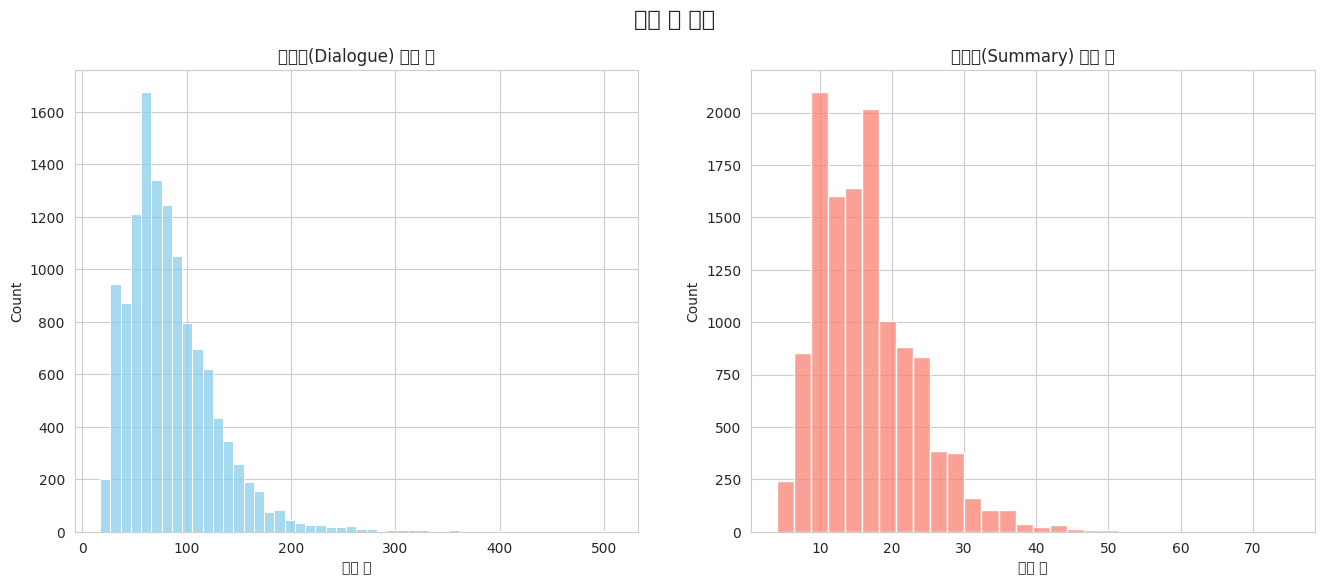

In [24]:
plt.rc('font', family='NanumBarunGothic')

# 'dialogue'ÏôÄ 'summary'Ïùò Îã®Ïñ¥ ÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïª¨Îüº Ï∂îÍ∞Ä
train_df['dialogue_word_count'] = train_df['dialogue'].apply(lambda x: len(str(x).split()))
train_df['summary_word_count'] = train_df['summary'].apply(lambda x: len(str(x).split()))

# Í∏∏Ïù¥ ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Ï∂úÎ†•
print("Í∞Å Ïª¨ÎüºÎ≥Ñ Îã®Ïñ¥ Ïàò ÌÜµÍ≥Ñ:")
print(train_df[['dialogue_word_count', 'summary_word_count']].describe())

# Í∏∏Ïù¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Îã®Ïñ¥ Ïàò Î∂ÑÌè¨', fontsize=16)

# ÎåÄÌôîÎ¨∏ Í∏∏Ïù¥ Î∂ÑÌè¨
sns.histplot(train_df['dialogue_word_count'], bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('ÎåÄÌôîÎ¨∏(Dialogue) Îã®Ïñ¥ Ïàò')
axes[0].set_xlabel('Îã®Ïñ¥ Ïàò')

# ÏöîÏïΩÎ¨∏ Í∏∏Ïù¥ Î∂ÑÌè¨
sns.histplot(train_df['summary_word_count'], bins=30, ax=axes[1], color='salmon')
axes[1].set_title('ÏöîÏïΩÎ¨∏(Summary) Îã®Ïñ¥ Ïàò')
axes[1].set_xlabel('Îã®Ïñ¥ Ïàò')

plt.show()

/tmp/ipykernel_1096917/1801966576.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='speaker_count', data=train_df, palette='viridis')
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 5

ÎåÄÌôî Ï∞∏Ïó¨Ïûê Ïàò Î∂ÑÌè¨:
speaker_count
2    12335
3      107
4       10
5        3
6        1
7        1
Name: count, dtype: int64


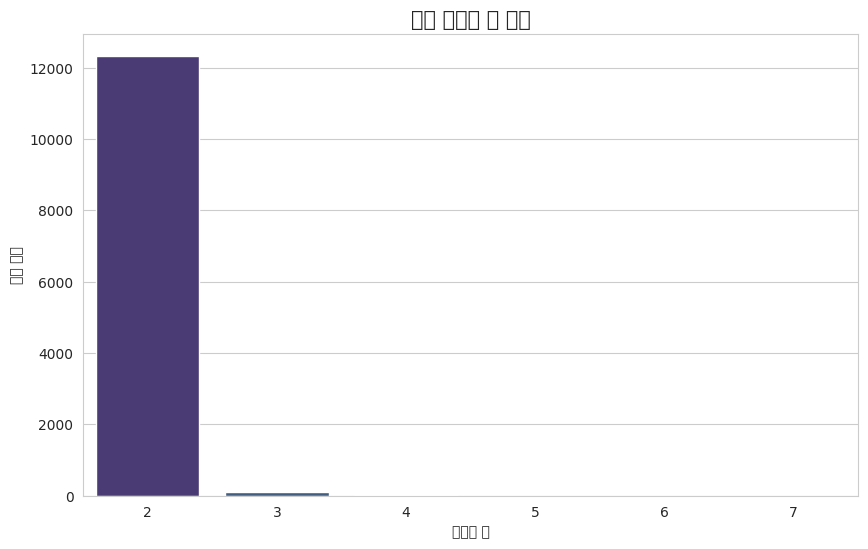

In [25]:
# Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ ÏÇ¨Ïö©Ìï¥ #PersonN# Ìå®ÌÑ¥ÏùÑ Ï∞æÏïÑ Ï∞∏Ïó¨Ïûê ÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò
def count_speakers(text):
    speakers = re.findall(r'(#Person\d#)', str(text))
    if not speakers:
        return 0
    return len(set(speakers))

# Ï∞∏Ïó¨Ïûê Ïàò Í≥ÑÏÇ∞ÌïòÏó¨ 'speaker_count' Ïª¨Îüº Ï∂îÍ∞Ä
train_df['speaker_count'] = train_df['dialogue'].apply(count_speakers)

print("ÎåÄÌôî Ï∞∏Ïó¨Ïûê Ïàò Î∂ÑÌè¨:")
print(train_df['speaker_count'].value_counts().sort_index())

# Ï∞∏Ïó¨Ïûê Ïàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.countplot(x='speaker_count', data=train_df, palette='viridis')
plt.title('ÎåÄÌôî Ï∞∏Ïó¨Ïûê Ïàò Î∂ÑÌè¨', fontsize=15)
plt.xlabel('Ï∞∏Ïó¨Ïûê Ïàò')
plt.ylabel('ÎåÄÌôî Í∞úÏàò')
plt.show()

ÏÉÅÏúÑ 15Í∞ú Ï£ºÏ†ú:
topic
ÏùåÏãù Ï£ºÎ¨∏       130
Ï∑®ÏóÖ Î©¥Ï†ë       109
Í∏∏ ÏïàÎÇ¥         66
Ìò∏ÌÖî Ï≤¥ÌÅ¨Ïù∏       40
ÏïÑÌååÌä∏ ÏûÑÎåÄ       30
ÏùºÏÉÅ ÎåÄÌôî        29
ÏáºÌïë           27
Ï£ºÎßê Í≥ÑÌöç        26
Î©¥Ï†ë           25
Ìò∏ÌÖî ÏòàÏïΩ        25
Ïó¨Ìñâ Í≥ÑÌöç        23
Ìï≠Í≥µÍ∂å ÏòàÏïΩ       22
ÏòÅÌôî Í∞êÏÉÅ        21
ÏûëÎ≥Ñ Ïù∏ÏÇ¨        21
Ìú¥Í∞Ä Í≥ÑÌöç        21
Í∞ÄÍ≤© ÌòëÏÉÅ        20
ÌÉùÏãú Ïù¥Ïö©        20
ÏòÅÌôî Í¥ÄÎûå Í≥ÑÌöç     18
ÏùòÎ£å ÏÉÅÎã¥        16
ÌååÌã∞ Ï¥àÎåÄ        16
Name: count, dtype: int64


/tmp/ipykernel_1096917/839871912.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_topics.index, x=top_topics.values, orient='h', palette='coolwarm')
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/tmp/ipykernel_1096917/839871912.py:13: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1096917/839871912.py:13: UserWarning: Glyph 54868 (\N{HANGUL S

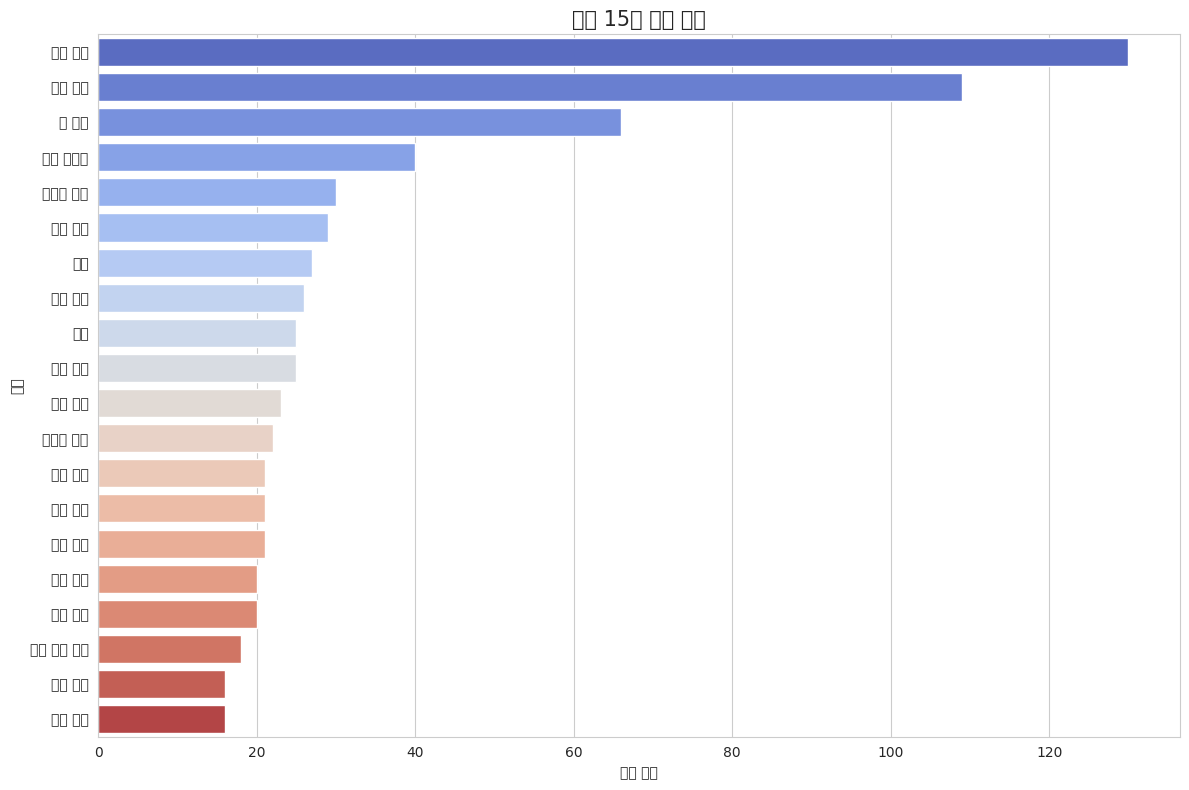

In [26]:
# Ï£ºÏ†úÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏ (ÏÉÅÏúÑ 15Í∞ú)
top_topics = train_df['topic'].value_counts().nlargest(20)

print("ÏÉÅÏúÑ 15Í∞ú Ï£ºÏ†ú:")
print(top_topics)

# Ï£ºÏ†ú Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.barplot(y=top_topics.index, x=top_topics.values, orient='h', palette='coolwarm')
plt.title('ÏÉÅÏúÑ 15Í∞ú Ï£ºÏ†ú Î∂ÑÌè¨', fontsize=15)
plt.xlabel('ÎåÄÌôî Í∞úÏàò')
plt.ylabel('Ï£ºÏ†ú')
plt.tight_layout()
plt.show()

In [27]:
# Calculate unique topics from train_df and print the total count.
unique_topics = train_df['topic'].unique()
print("Ï¥ù Ï£ºÏ†ú Í∞úÏàò:", len(unique_topics))

# Ï†ÑÏ≤¥ ÎåÄÌôî Í∞úÏàò Ï∂úÎ†• (TrainÍ≥º Validation)
print(f"Ï†ÑÏ≤¥ ÎåÄÌôî Í∞úÏàò (Train): {len(train_df)}")
print(f"Ï†ÑÏ≤¥ ÎåÄÌôî Í∞úÏàò (Validation): {len(val_df)}\n")

# Í∞Å Ï£ºÏ†úÎ≥Ñ ÎåÄÌôî Í∞úÏàò Ï∂úÎ†• (ÏÉÅÏúÑ Ï£ºÏ†ú Ïàú)
print("Í∞Å Ï£ºÏ†úÎ≥Ñ ÎåÄÌôî Í∞úÏàò:")
print(top_topics)

Ï¥ù Ï£ºÏ†ú Í∞úÏàò: 9235
Ï†ÑÏ≤¥ ÎåÄÌôî Í∞úÏàò (Train): 12457
Ï†ÑÏ≤¥ ÎåÄÌôî Í∞úÏàò (Validation): 499

Í∞Å Ï£ºÏ†úÎ≥Ñ ÎåÄÌôî Í∞úÏàò:
topic
ÏùåÏãù Ï£ºÎ¨∏       130
Ï∑®ÏóÖ Î©¥Ï†ë       109
Í∏∏ ÏïàÎÇ¥         66
Ìò∏ÌÖî Ï≤¥ÌÅ¨Ïù∏       40
ÏïÑÌååÌä∏ ÏûÑÎåÄ       30
ÏùºÏÉÅ ÎåÄÌôî        29
ÏáºÌïë           27
Ï£ºÎßê Í≥ÑÌöç        26
Î©¥Ï†ë           25
Ìò∏ÌÖî ÏòàÏïΩ        25
Ïó¨Ìñâ Í≥ÑÌöç        23
Ìï≠Í≥µÍ∂å ÏòàÏïΩ       22
ÏòÅÌôî Í∞êÏÉÅ        21
ÏûëÎ≥Ñ Ïù∏ÏÇ¨        21
Ìú¥Í∞Ä Í≥ÑÌöç        21
Í∞ÄÍ≤© ÌòëÏÉÅ        20
ÌÉùÏãú Ïù¥Ïö©        20
ÏòÅÌôî Í¥ÄÎûå Í≥ÑÌöç     18
ÏùòÎ£å ÏÉÅÎã¥        16
ÌååÌã∞ Ï¥àÎåÄ        16
Name: count, dtype: int64


In [ ]:
%pip install scikit-learn

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Î∞îÏù¥Í∑∏Îû®(2-gram) ÏÉÅÏúÑ 20Í∞ú Ï∂îÏ∂ú Ìï®Ïàò
def get_top_ngrams(corpus, ngram_range=(2, 2), n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# ÎåÄÌôîÎ¨∏Í≥º ÏöîÏïΩÎ¨∏ÏóêÏÑú ÏûêÏ£º ÏÇ¨Ïö©ÎêòÎäî Î∞îÏù¥Í∑∏Îû® ÌôïÏù∏
top_dialogue_ngrams = get_top_ngrams(train_df['dialogue'].dropna())
top_summary_ngrams = get_top_ngrams(train_df['summary'].dropna())

print("--- ÎåÄÌôîÎ¨∏ ÏÉÅÏúÑ Î∞îÏù¥Í∑∏Îû® ---")
print(pd.DataFrame(top_dialogue_ngrams, columns=['Ngram', 'Count']))
print("\n--- ÏöîÏïΩÎ¨∏ ÏÉÅÏúÑ Î∞îÏù¥Í∑∏Îû® ---")
print(pd.DataFrame(top_summary_ngrams, columns=['Ngram', 'Count']))

--- ÎåÄÌôîÎ¨∏ ÏÉÅÏúÑ Î∞îÏù¥Í∑∏Îû® ---
             Ngram  Count
0       ÏûàÏñ¥ person2   2166
1       Í±∞Ïïº person2   1759
2       ÏûàÏñ¥ person1   1663
3       Í±∞Ïïº person1   1509
4    person1 ÏïàÎÖïÌïòÏÑ∏Ïöî   1418
5       person1 Í∑∏Îüº   1416
6       person2 Ï†ïÎßê   1317
7       person2 ÎßûÏïÑ   1309
8       person1 Ï†ïÎßê   1305
9      ÏûàÎÇòÏöî person2   1246
10     ÏûàÏñ¥Ïöî person1   1227
11     ÏûàÏñ¥Ïöî person2   1046
12      person1 ÎßûÏïÑ    993
13      person2 Í∑∏Îüº    973
14  ÎèÑÏôÄÎìúÎ¶¥ÍπåÏöî person2    948
15   person1 ÏïåÍ≤†ÏäµÎãàÎã§    915
16      Í∞ôÏïÑ person1    907
17      Í∞ôÏïÑ person2    873
18     ÏûàÎÇòÏöî person1    812
19      person1 ÏïàÎÖï    783

--- ÏöîÏïΩÎ¨∏ ÏÉÅÏúÑ Î∞îÏù¥Í∑∏Îû® ---
              Ngram  Count
0   person1 person2   3672
1        person1 ÏóêÍ≤å   2258
2        person2 ÏóêÍ≤å   2066
3   person2 person1   1957
4         ÎåÄÌï¥ Ïù¥ÏïºÍ∏∞Ìï©ÎãàÎã§    264
5          ÎåÄÌï¥ ÏÑ§Î™ÖÌï©ÎãàÎã§    178
6          ÎåÄÌï¥ Ïù¥ÏïºÍ∏∞ÌïúÎã§    161
7

--- ÏöîÏïΩÎ¨∏ Ï∂îÏÉÅÏÑ± Î∂ÑÏÑù ---
count    12457.000000
mean         0.930650
std          0.087472
min          0.333333
25%          0.888889
50%          0.952381
75%          1.000000
max          1.000000
Name: abstractiveness_score, dtype: float64


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

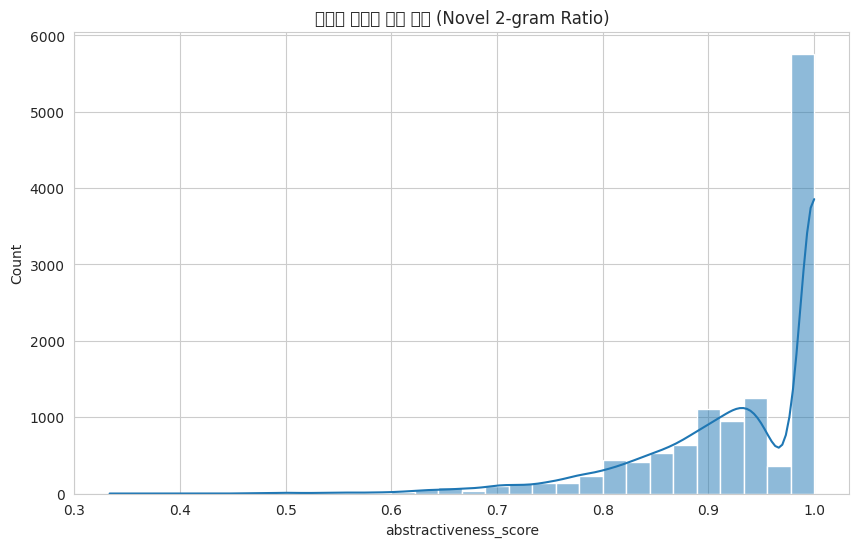

In [30]:
# ÌÖçÏä§Ìä∏Î•º n-gram ÏßëÌï©ÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
def get_ngrams(text, n):
    words = str(text).split()
    return set(zip(*[words[i:] for i in range(n)]))

# ÏÉàÎ°úÏö¥ Î∞îÏù¥Í∑∏Îû®(2-gram)Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
def calculate_novel_ngram_ratio(row, n=2):
    dialogue_ngrams = get_ngrams(row['dialogue'], n)
    summary_ngrams = get_ngrams(row['summary'], n)
    
    if not summary_ngrams:
        return 0.0
        
    novel_ngrams = summary_ngrams - dialogue_ngrams
    return len(novel_ngrams) / len(summary_ngrams)

# Ï∂îÏÉÅÏÑ± Ï†êÏàò Í≥ÑÏÇ∞
train_df['abstractiveness_score'] = train_df.apply(lambda row: calculate_novel_ngram_ratio(row, n=2), axis=1)

print("--- ÏöîÏïΩÎ¨∏ Ï∂îÏÉÅÏÑ± Î∂ÑÏÑù ---")
print(train_df['abstractiveness_score'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(train_df['abstractiveness_score'], bins=30, kde=True)
plt.title('ÏöîÏïΩÎ¨∏ Ï∂îÏÉÅÏÑ± Ï†êÏàò Î∂ÑÌè¨ (Novel 2-gram Ratio)')
plt.show()

/tmp/ipykernel_1096917/2097338126.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='topic', y='dialogue_word_count', data=df_top10, palette='Set3')
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/tmp/ipykernel_1096917/2097338126.py:18: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1096917/2097338126.py:18: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1096917/2097338126.py:18: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1096917/2097338126.py:18: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


--- Ï£ºÏ†úÎ≥Ñ ÎåÄÌôîÎ¨∏ Îã®Ïñ¥ Ïàò ÌÜµÍ≥Ñ ---
          count        mean        std   min    25%    50%     75%    max
topic                                                                    
Í∞ÄÍ≤© ÌòëÏÉÅ      20.0   91.400000  37.666682  27.0  65.50   97.5  117.75  154.0
Í∏∏ ÏïàÎÇ¥       66.0   76.818182  30.558347  27.0  57.25   76.0  102.50  153.0
Î©¥Ï†ë         25.0  131.320000  96.080574  50.0  64.00  100.0  142.00  459.0
ÏáºÌïë         27.0   75.370370  33.579009  30.0  49.50   71.0   90.50  170.0
ÏïÑÌååÌä∏ ÏûÑÎåÄ     30.0   94.233333  70.950047  26.0  58.00   79.5  104.75  424.0
Ïó¨Ìñâ Í≥ÑÌöç      23.0   85.130435  37.145053  27.0  59.50   85.0  120.00  140.0
ÏòÅÌôî Í∞êÏÉÅ      21.0   82.761905  33.528950  28.0  64.00   79.0  112.00  138.0
ÏòÅÌôî Í¥ÄÎûå Í≥ÑÌöç   18.0   80.611111  33.800694  42.0  55.75   71.0  101.00  159.0
ÏùåÏãù Ï£ºÎ¨∏     130.0   59.353846  24.017714  21.0  41.00   56.0   71.75  156.0
ÏùòÎ£å ÏÉÅÎã¥      16.0   76.750000  22.625944  19.0  63.50   78.0   90.

/tmp/ipykernel_1096917/2097338126.py:18: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1096917/2097338126.py:18: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1096917/2097338126.py:18: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1096917/2097338126.py:18: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL S

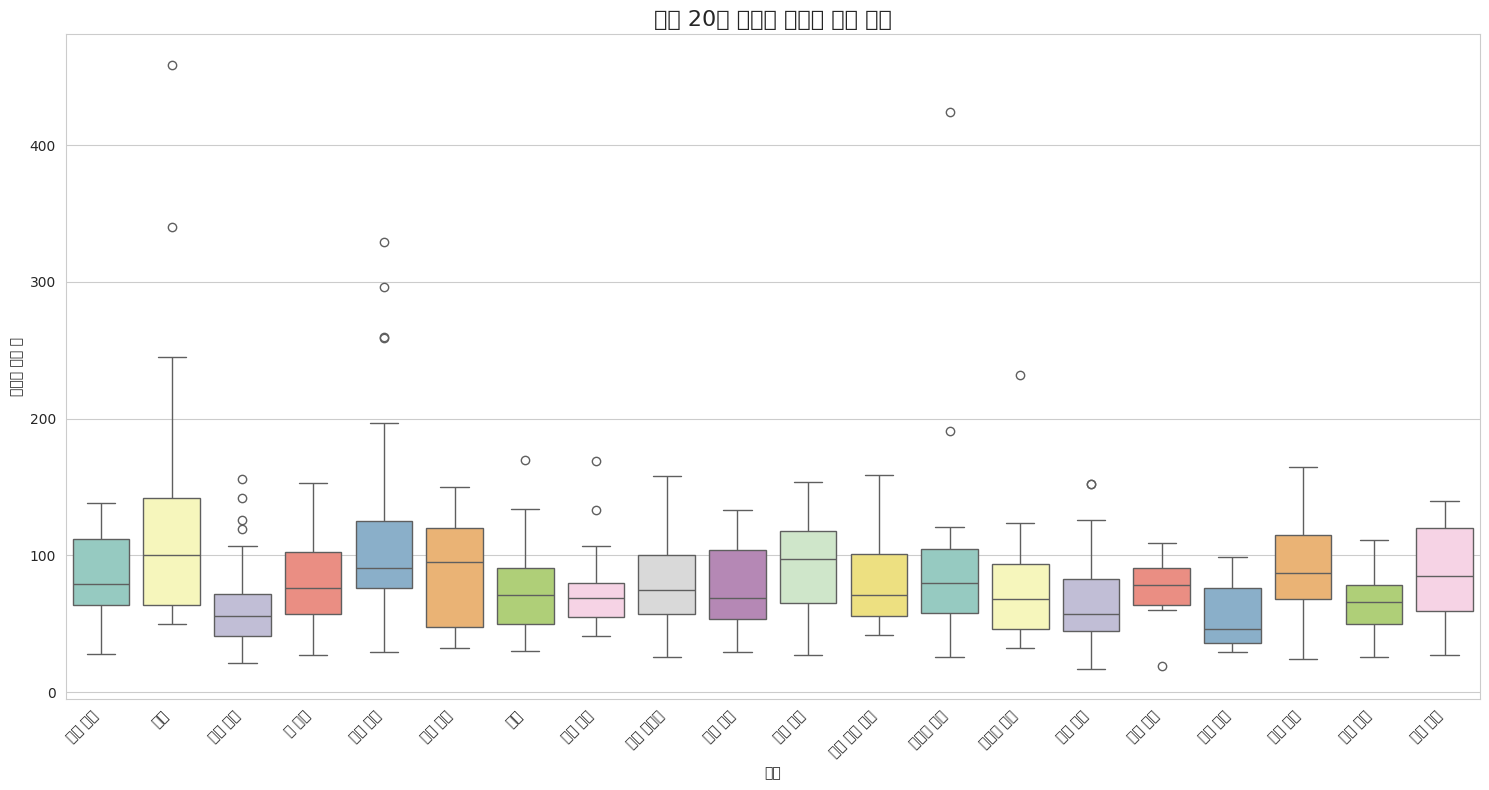

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 10Í∞ú Ï£ºÏ†úÎ•º ÏÑ†ÌÉùÌï©ÎãàÎã§.
top_20_topics = train_df['topic'].value_counts().nlargest(20).index
df_top10 = train_df[train_df['topic'].isin(top_20_topics)]

print("--- Ï£ºÏ†úÎ≥Ñ ÎåÄÌôîÎ¨∏ Îã®Ïñ¥ Ïàò ÌÜµÍ≥Ñ ---")
print(df_top10.groupby('topic')['dialogue_word_count'].describe())

# Ï£ºÏ†úÎ≥Ñ ÎåÄÌôî Í∏∏Ïù¥ Î∂ÑÌè¨Î•º BoxplotÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 8))
sns.boxplot(x='topic', y='dialogue_word_count', data=df_top10, palette='Set3')
plt.title('ÏÉÅÏúÑ 20Í∞ú Ï£ºÏ†úÎ≥Ñ ÎåÄÌôîÎ¨∏ Í∏∏Ïù¥ Î∂ÑÌè¨', fontsize=16)
plt.xlabel('Ï£ºÏ†ú')
plt.ylabel('ÎåÄÌôîÎ¨∏ Îã®Ïñ¥ Ïàò')
plt.xticks(rotation=45, ha='right') # xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ
plt.tight_layout()
plt.show()

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canv

--- ÎåÄÌôî Íµ¨Ï°∞ Î∂ÑÏÑù ÌÜµÍ≥Ñ ---
        total_turns  balance_ratio
count  12457.000000   12457.000000
mean       9.485189       0.523385
std        4.145723       0.035587
min        2.000000       0.272727
25%        7.000000       0.500000
50%        9.000000       0.500000
75%       12.000000       0.545455
max       59.000000       0.666667


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic'

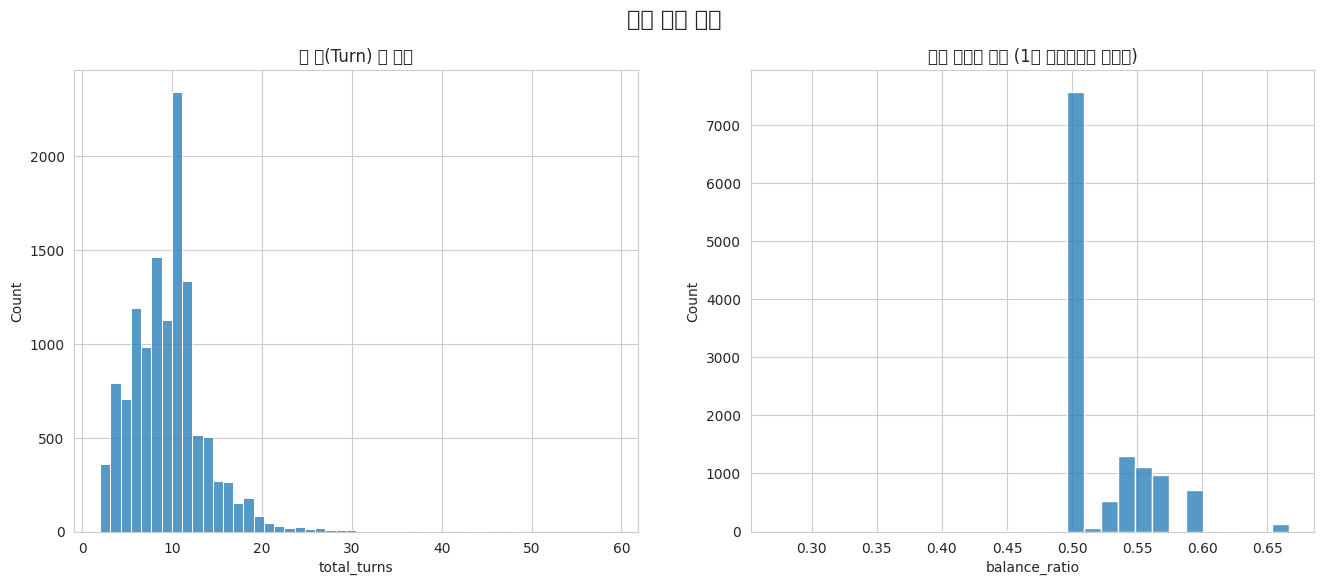

In [32]:
import re
import numpy as np

def analyze_dialogue_structure(dialogue):
    # Person ÌÉúÍ∑∏Î•º Í∏∞Ï§ÄÏúºÎ°ú Î∞úÌôî(turn)Î•º Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
    turns = re.split(r'(#Person\d#:\s*)', str(dialogue))
    if len(turns) <= 1:
        return 0, 0.0

    # ÌôîÏûêÎ≥Ñ Î∞úÌôî ÌöüÏàò Í≥ÑÏÇ∞
    speakers = [t for t in turns if t.startswith('#Person')]
    speaker_counts = pd.Series(speakers).value_counts()
    
    # Ï†ÑÏ≤¥ ÌÑ¥ Ïàò
    total_turns = len(speakers)
    
    # ÎåÄÌôî Í∑†ÌòïÎèÑ (1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Í∑†Îì±ÌïòÍ≤å ÎåÄÌôî)
    # (Í∞ÄÏû• ÎßéÏù¥ ÎßêÌïú ÏÇ¨ÎûåÏùò Î∞úÌôî ÎπÑÏ§ë)
    if total_turns > 0:
        balance_ratio = speaker_counts.max() / total_turns
    else:
        balance_ratio = 0.0
        
    return total_turns, balance_ratio

# Î∂ÑÏÑù Ï†ÅÏö©
results = train_df['dialogue'].apply(analyze_dialogue_structure)
train_df['total_turns'] = results.apply(lambda x: x[0])
train_df['balance_ratio'] = results.apply(lambda x: x[1])

print("--- ÎåÄÌôî Íµ¨Ï°∞ Î∂ÑÏÑù ÌÜµÍ≥Ñ ---")
print(train_df[['total_turns', 'balance_ratio']].describe())

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('ÎåÄÌôî Íµ¨Ï°∞ Î∂ÑÏÑù', fontsize=16)

sns.histplot(train_df['total_turns'], bins=50, ax=axes[0])
axes[0].set_title('Ï¥ù ÌÑ¥(Turn) Ïàò Î∂ÑÌè¨')

sns.histplot(train_df['balance_ratio'], bins=30, ax=axes[1])
axes[1].set_title('ÎåÄÌôî Í∑†ÌòïÎèÑ Î∂ÑÌè¨ (1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î∂àÍ∑†Îì±)')

plt.show()

--- Train Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ ---
       dialogue_word_count  summary_word_count  abstractiveness_score
count         12457.000000        12457.000000           12457.000000
mean             84.464478           16.480694               0.930650
std              43.613074            7.015613               0.087472
min              17.000000            4.000000               0.333333
25%              56.000000           11.000000               0.888889
50%              75.000000           15.000000               0.952381
75%             106.000000           20.000000               1.000000
max             508.000000           75.000000               1.000000

--- Validation Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ ---
       dialogue_word_count  summary_word_count  abstractiveness_score
count           499.000000          499.000000             499.000000
mean             83.541082           15.348697               0.940915
std              41.547667            6.720365               0.081052
min              22.00

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.

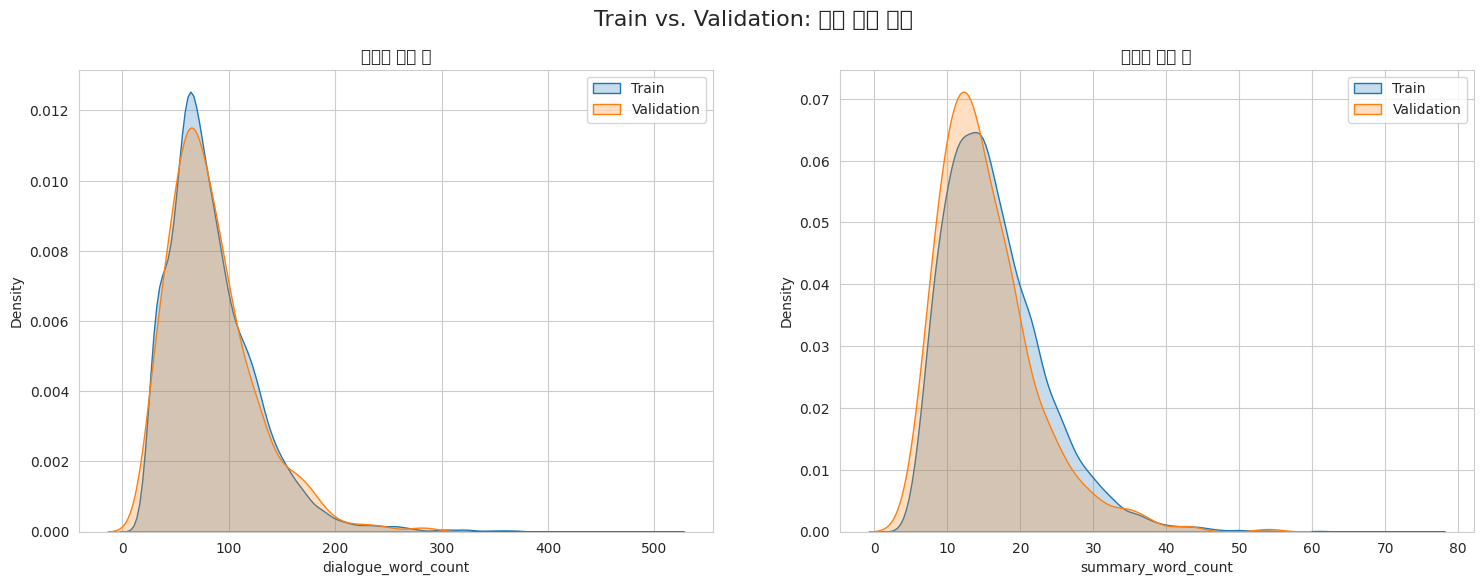

/tmp/ipykernel_1096917/3714656308.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=train_topics.index, x=train_topics.values, ax=axes[0], palette='Blues_d')
/tmp/ipykernel_1096917/3714656308.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=val_topics.index, x=val_topics.values, ax=axes[1], palette='Greens_d')
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: F

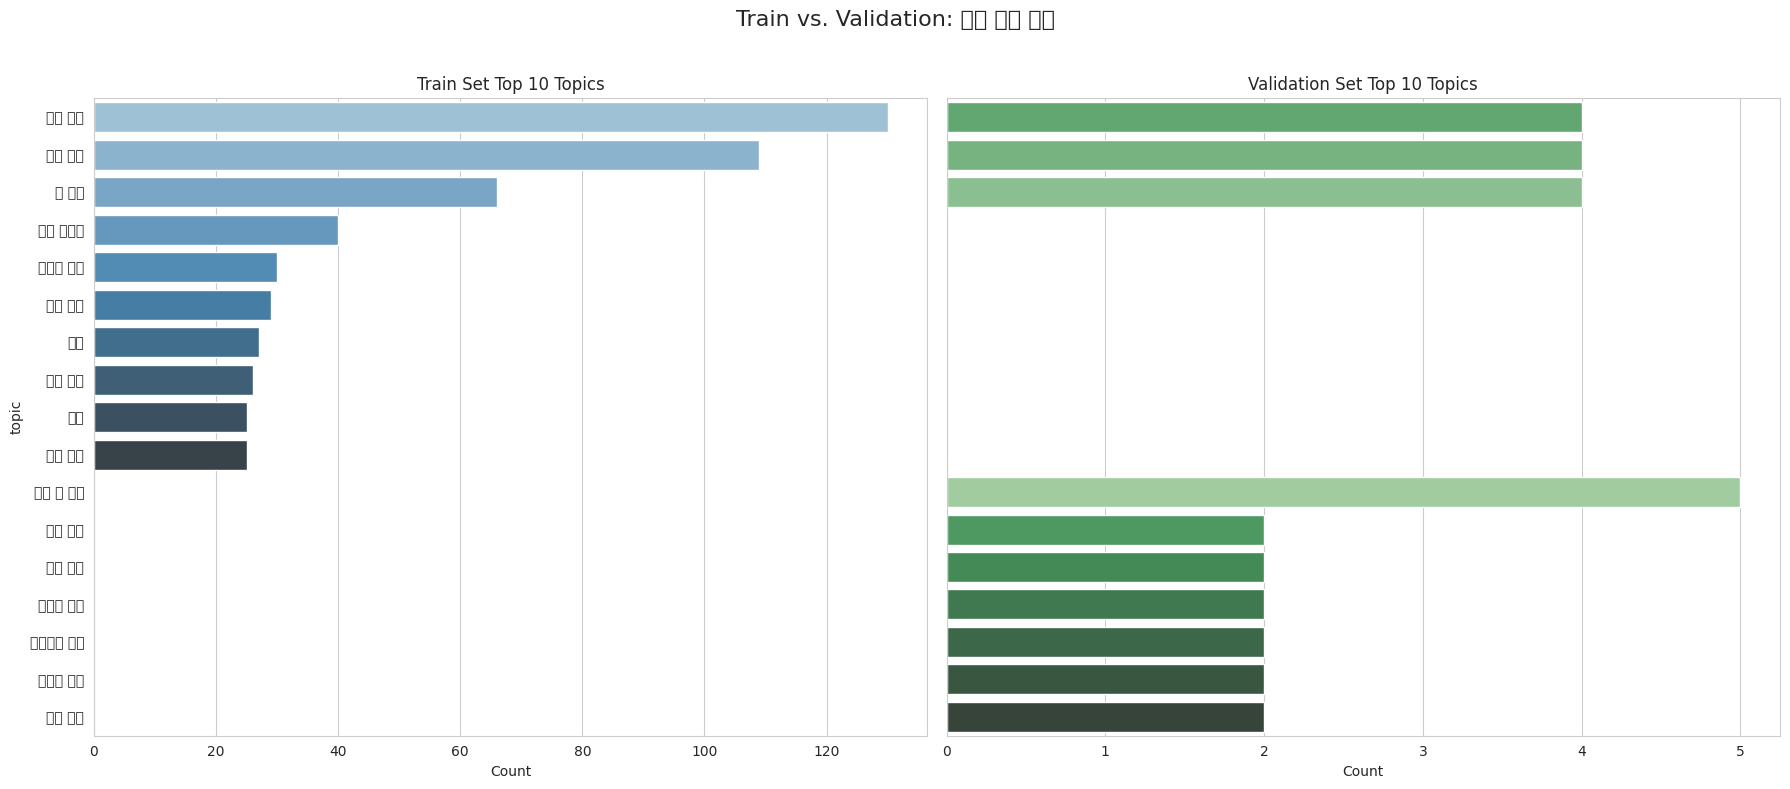

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

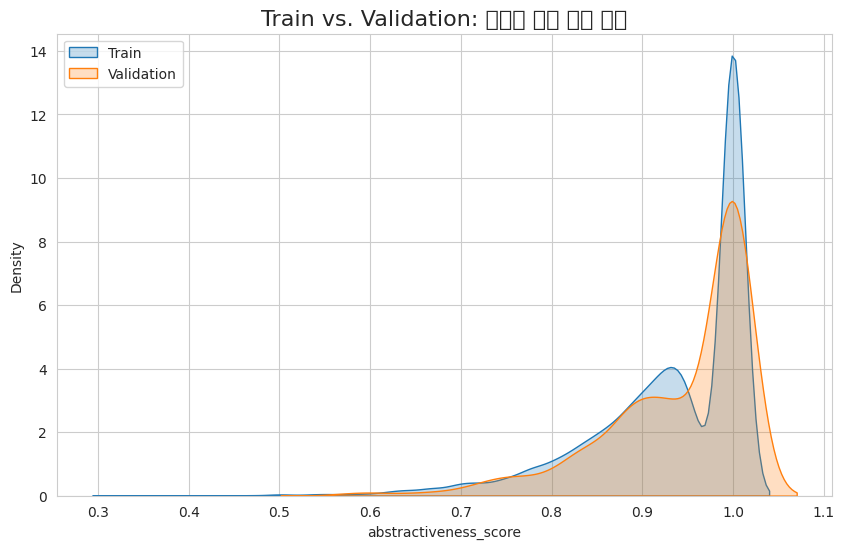

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Îç∞Ïù¥ÌÑ∞ Î°úÎìú ---
# Ïù¥Ï†ÑÏóê ÏÇ¨Ïö©ÌïòÏã† config Î≥ÄÏàòÍ∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# data_path = loaded_config['general']['data_path']
# train_df = pd.read_csv(f"{data_path}/train.csv")
# val_df = pd.read_csv(f"{data_path}/dev.csv")

# --- ÎπÑÍµêÎ•º ÏúÑÌïú Ï†ÑÏ≤òÎ¶¨ ---
# (Ïù¥Ï†ÑÏóê ÏÇ¨Ïö©Ìïú Ìï®ÏàòÎì§Ïù¥ Ï†ïÏùòÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§)
def get_ngrams(text, n):
    words = str(text).split()
    return set(zip(*[words[i:] for i in range(n)]))

def calculate_novel_ngram_ratio(row, n=2):
    dialogue_ngrams = get_ngrams(row['dialogue'], n)
    summary_ngrams = get_ngrams(row['summary'], n)
    if not summary_ngrams: return 0.0
    novel_ngrams = summary_ngrams - dialogue_ngrams
    return len(novel_ngrams) / len(summary_ngrams)

# 1. Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Î∂ÑÏÑù Ïª¨Îüº Ï∂îÍ∞Ä
for df in [train_df, val_df]:
    df['dialogue_word_count'] = df['dialogue'].apply(lambda x: len(str(x).split()))
    df['summary_word_count'] = df['summary'].apply(lambda x: len(str(x).split()))
    df['abstractiveness_score'] = df.apply(lambda row: calculate_novel_ngram_ratio(row, n=2), axis=1)

print("--- Train Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ ---")
print(train_df[['dialogue_word_count', 'summary_word_count', 'abstractiveness_score']].describe())
print("\n--- Validation Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ ---")
print(val_df[['dialogue_word_count', 'summary_word_count', 'abstractiveness_score']].describe())


# --- 2. ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú Î∂ÑÌè¨ ÎπÑÍµê ---

# (1) Í∏∏Ïù¥ Î∂ÑÌè¨ ÎπÑÍµê (ÎåÄÌôîÎ¨∏ & ÏöîÏïΩÎ¨∏)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Train vs. Validation: Í∏∏Ïù¥ Î∂ÑÌè¨ ÎπÑÍµê', fontsize=16)

sns.kdeplot(data=train_df, x='dialogue_word_count', ax=axes[0], label='Train', fill=True)
sns.kdeplot(data=val_df, x='dialogue_word_count', ax=axes[0], label='Validation', fill=True)
axes[0].set_title('ÎåÄÌôîÎ¨∏ Îã®Ïñ¥ Ïàò')
axes[0].legend()

sns.kdeplot(data=train_df, x='summary_word_count', ax=axes[1], label='Train', fill=True)
sns.kdeplot(data=val_df, x='summary_word_count', ax=axes[1], label='Validation', fill=True)
axes[1].set_title('ÏöîÏïΩÎ¨∏ Îã®Ïñ¥ Ïàò')
axes[1].legend()

plt.show()


# (2) Ï£ºÏ†ú Î∂ÑÌè¨ ÎπÑÍµê
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
fig.suptitle('Train vs. Validation: Ï£ºÏ†ú Î∂ÑÌè¨ ÎπÑÍµê', fontsize=16)

train_topics = train_df['topic'].value_counts().nlargest(10)
val_topics = val_df['topic'].value_counts().nlargest(10)

sns.barplot(y=train_topics.index, x=train_topics.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('Train Set Top 10 Topics')
axes[0].set_xlabel('Count')

sns.barplot(y=val_topics.index, x=val_topics.values, ax=axes[1], palette='Greens_d')
axes[1].set_title('Validation Set Top 10 Topics')
axes[1].set_xlabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# (3) Ï∂îÏÉÅÏÑ± Ï†êÏàò Î∂ÑÌè¨ ÎπÑÍµê
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_df, x='abstractiveness_score', label='Train', fill=True)
sns.kdeplot(data=val_df, x='abstractiveness_score', label='Validation', fill=True)
plt.title('Train vs. Validation: Ï∂îÏÉÅÏÑ± Ï†êÏàò Î∂ÑÌè¨ ÎπÑÍµê', fontsize=16)
plt.legend()
plt.show()

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.

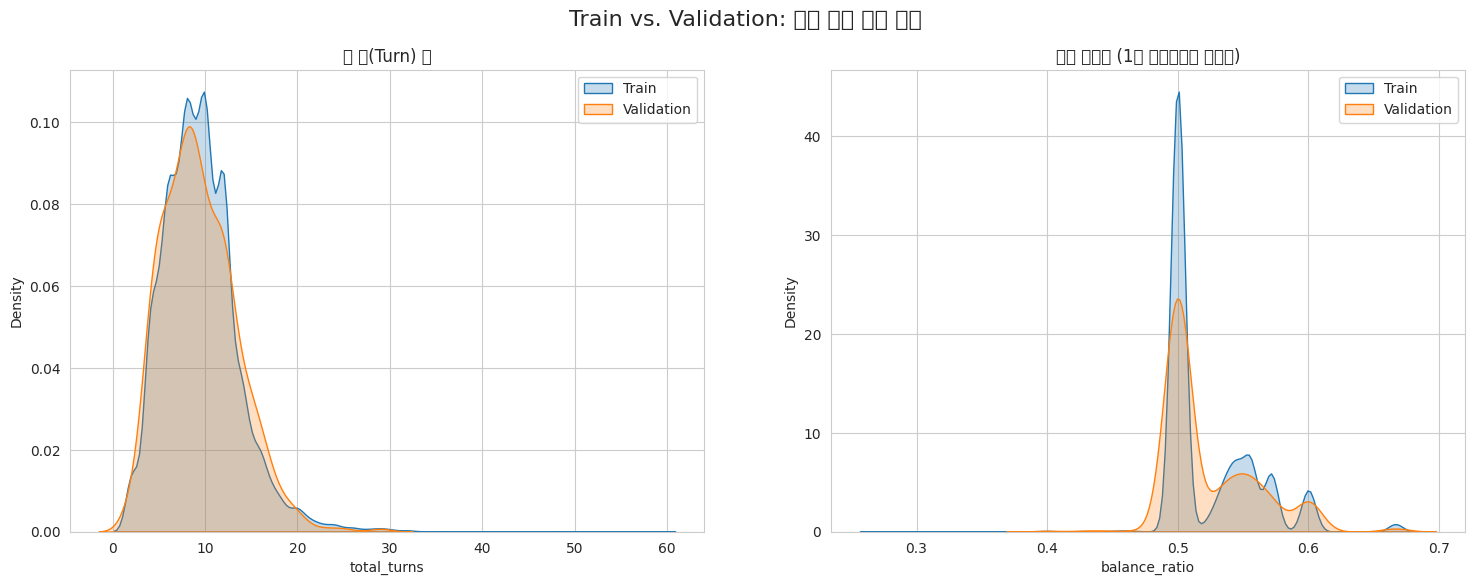

In [34]:
# (Ïù¥Ï†ÑÏóê ÏÇ¨Ïö©Ìïú analyze_dialogue_structure Ìï®ÏàòÍ∞Ä Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§)
# def analyze_dialogue_structure(dialogue): ...

# Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌôî Íµ¨Ï°∞ Î∂ÑÏÑù Ï†ÅÏö©
for df in [train_df, val_df]:
    results = df['dialogue'].apply(analyze_dialogue_structure)
    df['total_turns'] = results.apply(lambda x: x[0])
    df['balance_ratio'] = results.apply(lambda x: x[1])

# ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú Î∂ÑÌè¨ ÎπÑÍµê
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Train vs. Validation: ÎåÄÌôî Íµ¨Ï°∞ Î∂ÑÌè¨ ÎπÑÍµê', fontsize=16)

# Ï¥ù ÌÑ¥(Turn) Ïàò Î∂ÑÌè¨ ÎπÑÍµê
sns.kdeplot(data=train_df, x='total_turns', ax=axes[0], label='Train', fill=True)
sns.kdeplot(data=val_df, x='total_turns', ax=axes[0], label='Validation', fill=True)
axes[0].set_title('Ï¥ù ÌÑ¥(Turn) Ïàò')
axes[0].legend()

# ÎåÄÌôî Í∑†ÌòïÎèÑ Î∂ÑÌè¨ ÎπÑÍµê
sns.kdeplot(data=train_df, x='balance_ratio', ax=axes[1], label='Train', fill=True)
sns.kdeplot(data=val_df, x='balance_ratio', ax=axes[1], label='Validation', fill=True)
axes[1].set_title('ÎåÄÌôî Í∑†ÌòïÎèÑ (1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î∂àÍ∑†Îì±)')
axes[1].legend()

plt.show()

In [35]:
# 1. Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤¥ Ïñ¥Ìúò ÏßëÌï©(Vocabulary Set) ÏÉùÏÑ±
train_vocab = set(word for dialogue in train_df['dialogue'].dropna() for word in str(dialogue).split())
val_vocab = set(word for dialogue in val_df['dialogue'].dropna() for word in str(dialogue).split())

print(f"Train Set Í≥†Ïú† Îã®Ïñ¥ Ïàò: {len(train_vocab):,} Í∞ú")
print(f"Validation Set Í≥†Ïú† Îã®Ïñ¥ Ïàò: {len(val_vocab):,} Í∞ú")

# 2. Ïñ¥Ìúò Ïú†ÏÇ¨ÎèÑ Î∞è OOV ÎπÑÏú® Í≥ÑÏÇ∞
intersection_size = len(train_vocab.intersection(val_vocab))
union_size = len(train_vocab.union(val_vocab))
jaccard_similarity = intersection_size / union_size

oov_words = val_vocab - train_vocab
oov_rate = len(oov_words) / len(val_vocab)

# 3. Í≤∞Í≥º Ï∂úÎ†•
print("\n--- Train vs. Validation Ïñ¥Ìúò ÎπÑÍµê ---")
print(f"Ïñ¥Ìúò Ïú†ÏÇ¨ÎèÑ (Jaccard Similarity): {jaccard_similarity:.4f}")
print(f"Validation SetÏùò ÎØ∏Îì±Ïû• Îã®Ïñ¥(OOV) ÎπÑÏú®: {oov_rate:.2%}")
print(f"(Validation Set Îã®Ïñ¥ Ï§ë {oov_rate:.2%}Îäî Train SetÏóê Îì±Ïû•ÌïòÏßÄ ÏïäÏùÄ ÏÉàÎ°úÏö¥ Îã®Ïñ¥ÏûÖÎãàÎã§.)")

Train Set Í≥†Ïú† Îã®Ïñ¥ Ïàò: 120,675 Í∞ú
Validation Set Í≥†Ïú† Îã®Ïñ¥ Ïàò: 13,695 Í∞ú

--- Train vs. Validation Ïñ¥Ìúò ÎπÑÍµê ---
Ïñ¥Ìúò Ïú†ÏÇ¨ÎèÑ (Jaccard Similarity): 0.0874
Validation SetÏùò ÎØ∏Îì±Ïû• Îã®Ïñ¥(OOV) ÎπÑÏú®: 21.14%
(Validation Set Îã®Ïñ¥ Ï§ë 21.14%Îäî Train SetÏóê Îì±Ïû•ÌïòÏßÄ ÏïäÏùÄ ÏÉàÎ°úÏö¥ Îã®Ïñ¥ÏûÖÎãàÎã§.)


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

def compare_datasets(train_df, val_df, test_df):
    """
    Train, Validation, Test ÏÑ∏ Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏûÖÎ†•Î∞õÏïÑ 
    Ï£ºÏöî ÌäπÏÑ±ÏùÑ ÎπÑÍµêÌïòÍ≥† ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
    """
    print(" Îç∞Ïù¥ÌÑ∞ÏÖã ÎπÑÍµê Î∂ÑÏÑùÏùÑ ÏãúÏûëÌï©ÎãàÎã§... ".center(50, "="))
    
    # --- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ---
    train_copy = train_df.copy()
    val_copy = val_df.copy()
    test_copy = test_df.copy()

    def analyze_dialogue_structure(dialogue):
        turns = re.split(r'(#Person\d#:\s*)', str(dialogue))
        if len(turns) <= 1: return 0, 0.0
        speakers = [t for t in turns if t.startswith('#Person')]
        speaker_counts = pd.Series(speakers).value_counts()
        total_turns = len(speakers)
        balance_ratio = speaker_counts.max() / total_turns if total_turns > 0 else 0.0
        return total_turns, balance_ratio

    for df in [train_copy, val_copy, test_copy]:
        df['dialogue_word_count'] = df['dialogue'].apply(lambda x: len(str(x).split()))
        results = df['dialogue'].apply(analyze_dialogue_structure)
        df['total_turns'] = results.apply(lambda x: x[0])
        df['balance_ratio'] = results.apply(lambda x: x[1])
        
    train_copy['source'] = 'Train'
    val_copy['source'] = 'Validation'
    test_copy['source'] = 'Test'
    combined_df = pd.concat([train_copy, val_copy, test_copy], ignore_index=True)

    # --- 1. ÎåÄÌôîÎ¨∏ Í∏∏Ïù¥ Î∂ÑÌè¨ ÎπÑÍµê ---
    plt.figure(figsize=(12, 7))
    sns.kdeplot(data=combined_df, x='dialogue_word_count', hue='source', fill=True, palette='viridis')
    plt.title('ÎåÄÌôîÎ¨∏ Í∏∏Ïù¥ Î∂ÑÌè¨ ÎπÑÍµê', fontsize=16)
    plt.show()

    # --- 2. Ï£ºÏ†ú Î∂ÑÌè¨ ÎπÑÍµê ---
    # üí° [ÏàòÏ†ï] test_dfÏóêÎäî 'topic' Ïª¨ÎüºÏù¥ ÏóÜÏúºÎØÄÎ°ú trainÍ≥º validationÎßå ÎπÑÍµêÌïòÎèÑÎ°ù Î≥ÄÍ≤Ω
    print("\n'test.csv'ÏóêÎäî 'topic' Ïª¨ÎüºÏù¥ ÏóÜÏúºÎØÄÎ°ú TrainÍ≥º ValidationÎßå ÎπÑÍµêÌï©ÎãàÎã§.")
    fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True) # 1x3 -> 1x2Î°ú Î≥ÄÍ≤Ω
    fig.suptitle('Ï£ºÏ†ú Î∂ÑÌè¨ ÎπÑÍµê (Train vs. Validation)', fontsize=16)
    
    sns.countplot(y='topic', data=train_copy, ax=axes[0], order=train_copy.topic.value_counts().iloc[:10].index, palette='Blues_d')
    axes[0].set_title('Train Set Top 10 Topics')
    
    sns.countplot(y='topic', data=val_copy, ax=axes[1], order=val_copy.topic.value_counts().iloc[:10].index, palette='Greens_d')
    axes[1].set_title('Validation Set Top 10 Topics')
    
    # test_df Í¥ÄÎ†® plot ÏΩîÎìú ÏÇ≠Ï†ú
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- 3. ÎåÄÌôî Íµ¨Ï°∞ Î∂ÑÌè¨ ÎπÑÍµê ---
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle('ÎåÄÌôî Íµ¨Ï°∞ Î∂ÑÌè¨ ÎπÑÍµê', fontsize=16)
    sns.kdeplot(data=combined_df, x='total_turns', hue='source', fill=True, ax=axes[0])
    axes[0].set_title('Ï¥ù ÌÑ¥(Turn) Ïàò')
    sns.kdeplot(data=combined_df, x='balance_ratio', hue='source', fill=True, ax=axes[1])
    axes[1].set_title('ÎåÄÌôî Í∑†ÌòïÎèÑ')
    plt.show()
    
    # --- 4. Ïñ¥Ìúò ÎπÑÍµê Î∂ÑÏÑù ---
    train_vocab = set(word for dialogue in train_copy['dialogue'].dropna() for word in str(dialogue).split())
    val_vocab = set(word for dialogue in val_copy['dialogue'].dropna() for word in str(dialogue).split())
    test_vocab = set(word for dialogue in test_copy['dialogue'].dropna() for word in str(dialogue).split())

    val_oov_words = val_vocab - train_vocab
    val_oov_rate = len(val_oov_words) / len(val_vocab) if len(val_vocab) > 0 else 0
    test_oov_words = test_vocab - train_vocab
    test_oov_rate = len(test_oov_words) / len(test_vocab) if len(test_vocab) > 0 else 0

    print(" Ïñ¥Ìúò ÎπÑÍµê Î∂ÑÏÑù ".center(50, "="))
    print(f"Train Set Í≥†Ïú† Îã®Ïñ¥ Ïàò: {len(train_vocab):,} Í∞ú")
    print(f"Validation Set Í≥†Ïú† Îã®Ïñ¥ Ïàò: {len(val_vocab):,} Í∞ú")
    print(f"Test Set Í≥†Ïú† Îã®Ïñ¥ Ïàò: {len(test_vocab):,} Í∞ú")
    print("-" * 50)
    print(f"Train ÎåÄÎπÑ Validation Set OOV ÎπÑÏú®: {val_oov_rate:.2%}")
    print(f"Train ÎåÄÎπÑ Test Set OOV ÎπÑÏú®: {test_oov_rate:.2%}")
    print("=" * 50)

In [37]:
# Ensure the necessary columns exist
if 'dialogue_word_count' not in train_df.columns:
    train_df['dialogue_word_count'] = train_df['dialogue'].apply(lambda x: len(str(x).split()))
if 'total_turns' not in train_df.columns:
    import re
    def analyze_dialogue_turns(dialogue):
        turns = re.split(r'(#Person\d#:\s*)', str(dialogue))
        if len(turns) <= 1:
            return 0
        # Count the number of tokens starting with "#Person"
        speakers = [t for t in turns if t.startswith('#Person')]
        return len(speakers)
    train_df['total_turns'] = train_df['dialogue'].apply(analyze_dialogue_turns)

# Í∞ÄÏû• Í∏¥ ÎåÄÌôîÎ¨∏ 3Í∞ú ÌôïÏù∏
print(" [Í∞ÄÏû• Í∏¥ ÎåÄÌôîÎ¨∏ Top 3] ".center(70, "="))
for i, row in train_df.nlargest(3, 'dialogue_word_count').iterrows():
    print(f"Í∏∏Ïù¥: {row['dialogue_word_count']} Îã®Ïñ¥")
    print(f"ÎÇ¥Ïö©: {row['dialogue'][:]}") # Ïïû 200ÏûêÎßå Ï∂úÎ†•
    print("-" * 70)

# ÌÑ¥(Turn) ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ ÎåÄÌôî 3Í∞ú ÌôïÏù∏
print("\n [ÌÑ¥(Turn) ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ ÎåÄÌôî Top 3] ".center(70, "="))
for i, row in train_df.nlargest(3, 'total_turns').iterrows():
    print(f"ÌÑ¥ Ïàò: {row['total_turns']} ÌÑ¥")
    print(f"ÎÇ¥Ïö©: {row['dialogue'][:]}")
    print("-" * 70)

========================== [Í∞ÄÏû• Í∏¥ ÎåÄÌôîÎ¨∏ Top 3] ==========================
Í∏∏Ïù¥: 508 Îã®Ïñ¥
ÎÇ¥Ïö©: #Person1#: ÏïàÎÖï, Ïñ¥ÎñªÍ≤å ÏßÄÎÇ¥?
#Person2#: Ïùå, Î≠ê Í∑∏ÎÉ• Í∑∏Îü≠Ï†ÄÎü≠... Ï¢Ä Í∑∏Î†áÍ∏¥ Ìï¥.
#Person1#: Í∑∏Îûò, ÏóÑÎßàÍ∞Ä DanielÏù¥ ÏöîÏ¶ò Ï¢Ä Ïïà Ï¢ãÎã§Í≥† ÌïòÎçîÎùº. Î¨¥Ïä® ÏùºÏù¥Ïïº?
#Person2#: Ïùå, Ïôú Í∑∏Îû¨ÎäîÏßÄ Î™®Î•¥Í≤†ÎäîÎç∞, ÏïÑÏù¥Îì§ ÌÇ§Ïö∞Îäî Í≤å Ïù¥Î†áÍ≤å ÌûòÎì§ Ï§ÑÏùÄ Î™∞ÎûêÏñ¥.
#Person1#: ÎßûÏïÑ, Í∑∏ ÎßàÏùå Ïù¥Ìï¥Ìï¥. Î¨¥Ïä® Î¨∏Ï†úÍ∞Ä ÏûàÏñ¥?
#Person2#: Í±∞Ïùò 6Îã¨ ÎèôÏïà Ïï†Í∞Ä Ï†ïÎßê Ïö∞Ïö∏Ìï¥ Î≥¥Ïù¥Í≥†, Í∞ÄÎÅî ÏïÑÏπ®Ïóê ÌïôÍµê Í∞ÄÎùºÍ≥† Íπ®Ïö∞ÏßÄÎèÑ Î™ªÌï¥. ÎÑàÎ¨¥ Ïö∞Ïö∏Ìï¥ Î≥¥Ïù¥ÎäîÎç∞, ÎèÑÎåÄÏ≤¥ Ïôú Í∑∏Îü∞ÏßÄ Î™®Î•¥Í≤†Ïñ¥.
#Person1#: 6Í∞úÏõî ÎèôÏïà Í∑∏Îü∞ Í±∞Ïïº?
#Person2#: Ïùë, Ï£ºÍ∏∞Ï†ÅÏúºÎ°ú Í∑∏Îü∞ Í≤É Í∞ôÏïÑ, Í∑ºÎç∞ Ïñ¥ÎñªÍ≤å Ìï¥Ïïº Ìï†ÏßÄ Î™®Î•¥Í≤†Ïñ¥. Í∑∏ÎÉ• Ïä§Ïä§Î°ú Í¥úÏ∞ÆÏïÑÏßà Ï§Ñ ÏïåÏïòÏñ¥.
#Person1#: ÏïÑ, Í∑∏Í≤å Ï¢Ä Í±±Ï†ïÏù¥ ÎßéÍ≤†Îã§. ÎÇòÎèÑ JaredÏù¥Îûë Ïïà Ïñ¥Ïö∏Î¶¨Îäî Í±∏ Ï¢Ä ÎäêÍºàÏóàÎäîÎç∞. Í∑∏Îüº, Íπ®Ïñ¥ ÏûàÏùÑ Îïê Î≠êÌï¥?
#Person2#

## 2. Trainer Î∞è Trainingargs Íµ¨Ï∂ïÌïòÍ∏∞
- Huggingface Ïùò Trainer ÏôÄ Training argumentsÎ•º ÌôúÏö©ÌïòÏó¨ Î™®Îç∏ ÌïôÏäµÏùÑ ÏùºÍ¥ÑÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨Ìï¥Ï£ºÎäî ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌï©ÎãàÎã§.

In [23]:
# Î™®Îç∏ ÏÑ±Îä•Ïóê ÎåÄÌïú ÌèâÍ∞Ä ÏßÄÌëúÎ•º Ï†ïÏùòÌï©ÎãàÎã§. Î≥∏ ÎåÄÌöåÏóêÏÑúÎäî ROUGE Ï†êÏàòÎ•º ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
def compute_metrics(config,tokenizer,pred):
    rouge = Rouge()
    predictions = pred.predictions
    labels = pred.label_ids

    predictions[predictions == -100] = tokenizer.pad_token_id
    labels[labels == -100] = tokenizer.pad_token_id

    decoded_preds = tokenizer.batch_decode(predictions, clean_up_tokenization_spaces=True)
    labels = tokenizer.batch_decode(labels, clean_up_tokenization_spaces=True)

    # Ï†ïÌôïÌïú ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ ÎØ∏Î¶¨ Ï†ïÏùòÎêú Î∂àÌïÑÏöîÌïú ÏÉùÏÑ±ÌÜ†ÌÅ∞Îì§ÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
    replaced_predictions = decoded_preds.copy()
    replaced_labels = labels.copy()
    remove_tokens = config['inference']['remove_tokens']
    for token in remove_tokens:
        replaced_predictions = [sentence.replace(token," ") for sentence in replaced_predictions]
        replaced_labels = [sentence.replace(token," ") for sentence in replaced_labels]

    print('-'*150)
    print(f"PRED: {replaced_predictions[0]}")
    print(f"GOLD: {replaced_labels[0]}")
    print('-'*150)
    print(f"PRED: {replaced_predictions[1]}")
    print(f"GOLD: {replaced_labels[1]}")
    print('-'*150)
    print(f"PRED: {replaced_predictions[2]}")
    print(f"GOLD: {replaced_labels[2]}")

    # ÏµúÏ¢ÖÏ†ÅÏù∏ ROUGE Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    results = rouge.get_scores(replaced_predictions, replaced_labels,avg=True)

    # ROUGE Ï†êÏàò Ï§ë F-1 scoreÎ•º ÌÜµÌï¥ ÌèâÍ∞ÄÌï©ÎãàÎã§.
    result = {key: value["f"] for key, value in results.items()}
    return result

In [24]:
# ÌïôÏäµÏùÑ ÏúÑÌïú trainer ÌÅ¥ÎûòÏä§ÏôÄ Îß§Í∞úÎ≥ÄÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
def load_trainer_for_train(config,generate_model,tokenizer,train_inputs_dataset,val_inputs_dataset):
    print('-'*10, 'Make training arguments', '-'*10,)
    # set training args
    training_args = Seq2SeqTrainingArguments(
                output_dir=config['general']['output_dir'], # model output directory
                overwrite_output_dir=config['training']['overwrite_output_dir'],
                num_train_epochs=config['training']['num_train_epochs'],  # total number of training epochs
                learning_rate=config['training']['learning_rate'], # learning_rate
                per_device_train_batch_size=config['training']['per_device_train_batch_size'], # batch size per device during training
                per_device_eval_batch_size=config['training']['per_device_eval_batch_size'],# batch size for evaluation
                warmup_ratio=config['training']['warmup_ratio'],  # number of warmup steps for learning rate scheduler
                weight_decay=config['training']['weight_decay'],  # strength of weight decay
                lr_scheduler_type=config['training']['lr_scheduler_type'],
                optim =config['training']['optim'],
                gradient_accumulation_steps=config['training']['gradient_accumulation_steps'],
                evaluation_strategy=config['training']['evaluation_strategy'], # evaluation strategy to adopt during training
                save_strategy =config['training']['save_strategy'],
                save_total_limit=config['training']['save_total_limit'], # number of total save model.
                fp16=config['training']['fp16'],
                load_best_model_at_end=config['training']['load_best_model_at_end'], # ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàò Ï†ÄÏû•
                seed=config['training']['seed'],
                logging_dir=config['training']['logging_dir'], # directory for storing logs
                logging_strategy=config['training']['logging_strategy'],
                predict_with_generate=config['training']['predict_with_generate'], #To use BLEU or ROUGE score
                generation_max_length=config['training']['generation_max_length'],
                do_train=config['training']['do_train'],
                do_eval=config['training']['do_eval'],
                report_to=config['training']['report_to'] # (ÏÑ†ÌÉù) wandbÎ•º ÏÇ¨Ïö©Ìï† Îïå ÏÑ§Ï†ïÌï©ÎãàÎã§.
            )

    # (ÏÑ†ÌÉù) Î™®Îç∏Ïùò ÌïôÏäµ Í≥ºÏ†ïÏùÑ Ï∂îÏ†ÅÌïòÎäî wandbÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ Ï¥àÍ∏∞Ìôî Ìï¥Ï§çÎãàÎã§.
    run = wandb.init(
        # entity=config['wandb']['entity'],
        project=config['wandb']['project'],
        name=config['wandb']['name'],
        config=config,
        settings=wandb.Settings(init_timeout=600),
        reinit=True
    )

    # (ÏÑ†ÌÉù) Î™®Îç∏ checkpointÎ•º wandbÏóê Ï†ÄÏû•ÌïòÎèÑÎ°ù ÌôòÍ≤Ω Î≥ÄÏàòÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
    os.environ["WANDB_LOG_MODEL"]="true"
    os.environ["WANDB_WATCH"]="false"

    # Validation lossÍ∞Ä Îçî Ïù¥ÏÉÅ Í∞úÏÑ†ÎêòÏßÄ ÏïäÏùÑ Îïå ÌïôÏäµÏùÑ Ï§ëÎã®ÏãúÌÇ§Îäî EarlyStopping Í∏∞Îä•ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    MyCallback = EarlyStoppingCallback(
        early_stopping_patience=config['training']['early_stopping_patience'],
        early_stopping_threshold=config['training']['early_stopping_threshold']
    )
    print('-'*10, 'Make training arguments complete', '-'*10,)
    print('-'*10, 'Make trainer', '-'*10,)

    # Trainer ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌï©ÎãàÎã§.
    trainer = Seq2SeqTrainer(
        model=generate_model, # ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÇ¨Ï†Ñ ÌïôÏäµÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Ìï† Î™®Îç∏ÏùÑ ÏûÖÎ†•Ìï©ÎãàÎã§.
        args=training_args,
        train_dataset=train_inputs_dataset,
        eval_dataset=val_inputs_dataset,
        compute_metrics = lambda pred: compute_metrics(config,tokenizer, pred),
        callbacks = [MyCallback]
    )
    print('-'*10, 'Make trainer complete', '-'*10,)

    return trainer

In [25]:
# ÌïôÏäµÏùÑ ÏúÑÌïú tokenizerÏôÄ ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
def load_tokenizer_and_model_for_train(config,device):
    print('-'*10, 'Load tokenizer & model', '-'*10,)
    print('-'*10, f'Model Name : {config["general"]["model_name"]}', '-'*10,)
    model_name = config['general']['model_name']
    bart_config = BartConfig().from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    generate_model = BartForConditionalGeneration.from_pretrained(config['general']['model_name'],config=bart_config)

    special_tokens_dict={'additional_special_tokens':config['tokenizer']['special_tokens']}
    tokenizer.add_special_tokens(special_tokens_dict)

    generate_model.resize_token_embeddings(len(tokenizer)) # ÏÇ¨Ï†ÑÏóê special tokenÏùÑ Ï∂îÍ∞ÄÌñàÏúºÎØÄÎ°ú Ïû¨Íµ¨ÏÑ± Ìï¥Ï§çÎãàÎã§.
    generate_model.to(device)
    print(generate_model.config)

    print('-'*10, 'Load tokenizer & model complete', '-'*10,)
    return generate_model , tokenizer

In [26]:
import torch
torch.cuda.empty_cache()


## 3. Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞

- ÏïûÏóêÏÑú Íµ¨Ï∂ïÌïú ÌÅ¥ÎûòÏä§ Î∞è Ìï®ÏàòÎ•º ÌôúÏö©ÌïòÏó¨ ÌïôÏäµ ÏßÑÌñâÌï©ÎãàÎã§.

In [27]:
def main(config):
    # ÏÇ¨Ïö©Ìï† deviceÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
    device = torch.device('cuda:0' if torch.cuda.is_available()  else 'cpu')
    print('-'*10, f'device : {device}', '-'*10,)
    print(torch.__version__)

    # ÏÇ¨Ïö©Ìï† Î™®Îç∏Í≥º tokenizerÎ•º Î∂àÎü¨ÏòµÎãàÎã§.
    generate_model , tokenizer = load_tokenizer_and_model_for_train(config,device)
    print('-'*10,"tokenizer special tokens : ",tokenizer.special_tokens_map,'-'*10)

    # ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
    preprocessor = Preprocess(config['tokenizer']['bos_token'], config['tokenizer']['eos_token']) # decoder_start_token: str, eos_token: str
    data_path = config['general']['data_path']
    train_inputs_dataset, val_inputs_dataset = prepare_train_dataset(config,preprocessor, data_path, tokenizer)

    # Trainer ÌÅ¥ÎûòÏä§Î•º Î∂àÎü¨ÏòµÎãàÎã§.
    trainer = load_trainer_for_train(config, generate_model,tokenizer,train_inputs_dataset,val_inputs_dataset)
    trainer.train()   # Î™®Îç∏ ÌïôÏäµÏùÑ ÏãúÏûëÌï©ÎãàÎã§.

    # (ÏÑ†ÌÉù) Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêú ÌõÑ wandbÎ•º Ï¢ÖÎ£åÌï©ÎãàÎã§.
    wandb.finish()

In [28]:
if __name__ == "__main__":
    main(loaded_config)

---------- device : cuda:0 ----------
2.1.0
---------- Load tokenizer & model ----------
---------- Model Name : digit82/kobart-summarization ----------


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


BartConfig {
  "_name_or_path": "digit82/kobart-summarization",
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.1,
  "d_model": 768,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "do_blenderbot_90_layernorm": false,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 3072,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 1,
  "extra_pos_embeddings": 2,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token_id": 2,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings":

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: junegood (junegood-). Use `wandb login --relogin` to force relogin


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


---------- Make training arguments complete ----------
---------- Make trainer ----------
---------- Make trainer complete ----------


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥¥ÏãúÎäî Í≤ÉÏùÑ Ï∂îÏ≤úÌï©ÎãàÎã§.                                                                           
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ#Person1# ÏùÄ#Person1#ÏóêÍ≤å #Person1#ÏóêÍ≤å #Person1# Ïùò Ïö¥Îèô ÏùºÏ†ïÏù¥ Îëê ÎÇ†ÏßúÎßå Î∞îÍæ∏Î©¥ ÎêúÎã§Í≥† ÏÑ§Î™ÖÌï©ÎãàÎã§.                                                                            
GOLD: #Perso

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ #Person2# ÏóêÍ≤å Í∞êÍ∏∞ Ï¶ùÏÉÅÏùÑ ÏÑ§Î™ÖÌï©ÎãàÎã§. #Person2# Îäî Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥¥ÎùºÍ≥† Í∂åÏú†Ìï©ÎãàÎã§.                                              
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ #Person2# ÏóêÍ≤å Ïö¥Îèô Í≥ÑÌöçÏùÑ ÏÑ§Î™ÖÌïòÍ≥†, #Person2# Îäî #Person1# ÏóêÍ≤å Ïö¥Îèô ÎÇ†ÏßúÎ•º Î≥ÄÍ≤ΩÌï¥ Îã¨ÎùºÍ≥† ÏöîÏ≤≠ÌïúÎã§.                                                 
GOLD: #Person1# Îäî JimmyÎ•º Ïö¥ÎèôÌïòÎü¨ Ï¥àÎåÄÌï

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person2# Îäî Í∞êÍ∏∞Ïóê Í±∏Î†∏ÏßÄÎßå, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥¥ÎùºÍ≥† Í∂åÏú†Ìï©ÎãàÎã§.                                                                               
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ #Person2# ÏóêÍ≤å Ïö¥Îèô ÎÇ†ÏßúÎ•º Î∞îÍæ∏ÏûêÍ≥† Ï†úÏïàÌïòÏßÄÎßå, #Person2# Îäî Ïö¥ÎèôÏù¥ ÏóâÎßùÏù¥ÎùºÍ≥† ÎãµÌï©ÎãàÎã§.                                                                            
GOLD: #Person1# Îäî JimmyÎ•º Ïö¥ÎèôÌïòÎü¨ Ï

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person2# Îäî Í∞êÍ∏∞Ïóê Í±∏Î†∏ÏßÄÎßå, #Person1# ÏùÄ Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥¥ÎùºÍ≥† Í∂åÏú†Ìï©ÎãàÎã§.                                                         
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ #Person2# ÏóêÍ≤å Ïö¥Îèô ÎÇ†ÏßúÎ•º Î≥ÄÍ≤ΩÌï¥ Îã¨ÎùºÍ≥† ÏöîÏ≤≠Ìï©ÎãàÎã§. #Person2# Îäî #Person1# ÏóêÍ≤å ÌÜ†ÏöîÏùºÏóê ÌïòÍ∏∞Î°ú Ìï©ÎãàÎã§.                                                       
GOLD: #Person1# Îäî JimmyÎ•º Ïö¥ÎèôÌïòÎü¨ Ï¥àÎåÄÌïòÍ≥†

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person2# Îäî Í∞êÍ∏∞Ïóê Í±∏Î†∏ÏßÄÎßå, #Person1# ÏùÄ Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥¥ÎùºÍ≥† Í∂åÏú†Ìï©ÎãàÎã§.                                                               
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ JimmyÏóêÍ≤å Ïö¥Îèô ÎÇ†ÏßúÎ•º Î∞îÍæ∏ÎùºÍ≥† Ï†úÏïàÌïòÏßÄÎßå, JimmyÎäî Ïö¥ÎèôÏù¥ ÏóâÎßùÏù¥ÎùºÍ≥† ÎäêÎÇçÎãàÎã§.                                                           
GOLD: #Person1# Îäî JimmyÎ•º Ïö¥ÎèôÌïòÎü¨ Ï¥àÎåÄÌïòÍ≥† ÌåîÍ≥º Î≥µÍ∑º Ïö¥

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person2# Îäî Í∞êÍ∏∞Ïóê Í±∏Î†∏ÏßÄÎßå, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥¥ÎùºÍ≥† Í∂åÏú†Ìï©ÎãàÎã§.                                                                               
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ JimmyÏóêÍ≤å Ïö¥Îèô ÎÇ†ÏßúÎ•º Î∞îÍæ∏ÏûêÍ≥† Ï†úÏïàÌïòÏßÄÎßå, JimmyÎäî Ïö¥ÎèôÏù¥ ÏóâÎßùÏù¥ÎùºÍ≥† ÌïúÎã§.                                                                          
GOLD: #Person1# Îäî JimmyÎ•º Ïö¥ÎèôÌïòÎü¨ Ï¥àÎåÄÌïòÍ≥† ÌåîÍ≥º

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person2# Îäî Í∞êÍ∏∞Ïóê Í±∏Î†∏ÏßÄÎßå Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥¥ÎùºÍ≥† Í∂åÏú†Ìï©ÎãàÎã§.                                                                                
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ JimmyÏóêÍ≤å Ïö¥Îèô ÎÇ†ÏßúÎ•º Î∞îÍæ∏ÎùºÍ≥† Ï†úÏïàÌïòÏßÄÎßå, JimmyÎäî Ïö¥ÎèôÏù¥ ÏóâÎßùÏù¥ÎùºÍ≥† ÎãµÌïúÎã§.                                                                         
GOLD: #Person1# Îäî JimmyÎ•º Ïö¥ÎèôÌïòÎü¨ Ï¥àÎåÄÌïòÍ≥† ÌåîÍ

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person2# Îäî Ïà®Ïâ¨Í∏∞ ÌûòÎì§Í≥† Í∞ÄÏä¥ ÎãµÎãµÌï®ÏùÑ Ìò∏ÏÜåÌï©ÎãàÎã§. #Person1# ÏùÄ Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥¥ÎùºÍ≥† Í∂åÏú†Ìï©ÎãàÎã§.                                                           
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ JimmyÏóêÍ≤å Ïö¥Îèô ÎÇ†ÏßúÎ•º Î∞îÍæ∏ÏûêÍ≥† Ï†úÏïàÌïòÏßÄÎßå, JimmyÎäî Ïö¥ÎèôÏù¥ ÏóâÎßùÏù¥ÎùºÍ≥† ÎãµÌï©ÎãàÎã§.                                                             
GOLD: #Person1# Îäî JimmyÎ•º Ïö¥ÎèôÌïòÎü¨

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person2# Îäî Í∞êÍ∏∞Ïóê Í±∏Î¶¨ÏßÄ ÏïäÏïòÏßÄÎßå, #Person1# ÏùÄ Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥¥ÎùºÍ≥† Í∂åÌï©ÎãàÎã§.                                                   
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ JimmyÏóêÍ≤å Ïö¥Îèô ÎÇ†ÏßúÎ•º Î≥ÄÍ≤ΩÌï¥ Îã¨ÎùºÍ≥† ÏöîÏ≤≠ÌïòÍ≥†, JimmyÎäî ÎèôÏùòÌïúÎã§.                                                     
GOLD: #Person1# Îäî JimmyÎ•º Ïö¥ÎèôÌïòÎü¨ Ï¥àÎåÄÌïòÍ≥† ÌåîÍ≥º Î≥µÍ∑º Ïö¥ÎèôÏùÑ ÌïòÎèÑÎ°ù ÏÑ§ÎìùÌï©ÎãàÎã§.

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}


------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person2# Îäî Í∞êÍ∏∞Ïóê Í±∏Î¶¨ÏßÄ ÏïäÏïòÏúºÎ©∞, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Î∞©Î¨∏Ìï† Í≤ÉÏùÑ Í∂åÏû•Ìï©ÎãàÎã§.                                                                             
GOLD: #Person2# Îäî Ïà®Ïâ¨Í∏∞ Ïñ¥Î†§ÏõåÌï©ÎãàÎã§. ÏùòÏÇ¨Îäî #Person2# ÏóêÍ≤å Ï¶ùÏÉÅÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ï≤úÏãù Í≤ÄÏÇ¨Î•º ÏúÑÌï¥ Ìèê Ï†ÑÎ¨∏ÏùòÏóêÍ≤å Í∞ÄÎ≥º Í≤ÉÏùÑ Í∂åÌï©ÎãàÎã§.                                                                     
------------------------------------------------------------------------------------------------------------------------------------------------------
PRED:  #Person1# ÏùÄ JimmyÏóêÍ≤å Ïö¥Îèô ÎÇ†ÏßúÎ•º Î∞îÍæ∏ÏûêÍ≥† Ï†úÏïàÌïòÏßÄÎßå, JimmyÎäî Ïö¥ÎèôÏù¥ ÏóâÎßùÏù¥ ÎêòÏñ¥ ÎèôÏùòÌïòÏßÄ ÏïäÏäµÎãàÎã§.                                                                       
GOLD: #Person1# Îäî JimmyÎ•º Ïö¥

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'forced_eos_token_id': 2}
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generati

## 4. Î™®Îç∏ Ï∂îÎ°†ÌïòÍ∏∞

In [34]:
# Ïù¥Í≥≥Ïóê ÎÇ¥Í∞Ä ÏÇ¨Ïö©Ìï† wandb config ÏÑ§Ï†ï
loaded_config['inference']['ckt_path'] = "./checkpoint-2000"

- test dataÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.

In [35]:
# tokenization Í≥ºÏ†ïÍπåÏßÄ ÏßÑÌñâÎêú ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Î™®Îç∏Ïóê ÏûÖÎ†•Îê† Îç∞Ïù¥ÌÑ∞Î•º Ï∂úÎ†•Ìï©ÎãàÎã§.
def prepare_test_dataset(config,preprocessor, tokenizer):

    test_file_path = os.path.join(config['general']['data_path'],'test.csv')

    test_data = preprocessor.make_set_as_df(test_file_path,is_train=False)
    test_id = test_data['fname']

    print('-'*150)
    print(f'test_data:\n{test_data["dialogue"][0]}')
    print('-'*150)

    encoder_input_test , decoder_input_test = preprocessor.make_input(test_data,is_test=True)
    print('-'*10, 'Load data complete', '-'*10,)

    test_tokenized_encoder_inputs = tokenizer(encoder_input_test, return_tensors="pt", padding=True,
                    add_special_tokens=True, truncation=True, max_length=config['tokenizer']['encoder_max_len'], return_token_type_ids=False,)
    test_tokenized_decoder_inputs = tokenizer(decoder_input_test, return_tensors="pt", padding=True,
                    add_special_tokens=True, truncation=True, max_length=config['tokenizer']['decoder_max_len'], return_token_type_ids=False,)

    test_encoder_inputs_dataset = DatasetForInference(test_tokenized_encoder_inputs, test_id, len(encoder_input_test))
    print('-'*10, 'Make dataset complete', '-'*10,)

    return test_data, test_encoder_inputs_dataset

In [36]:
# Ï∂îÎ°†ÏùÑ ÏúÑÌïú tokenizerÏôÄ ÌïôÏäµÏãúÌÇ® Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
def load_tokenizer_and_model_for_test(config,device):
    print('-'*10, 'Load tokenizer & model', '-'*10,)

    model_name = config['general']['model_name']
    ckt_path = config['inference']['ckt_path']
    print('-'*10, f'Model Name : {model_name}', '-'*10,)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    special_tokens_dict = {'additional_special_tokens': config['tokenizer']['special_tokens']}
    tokenizer.add_special_tokens(special_tokens_dict)

    generate_model = BartForConditionalGeneration.from_pretrained(ckt_path)
    generate_model.resize_token_embeddings(len(tokenizer))
    generate_model.to(device)
    print('-'*10, 'Load tokenizer & model complete', '-'*10,)

    return generate_model , tokenizer

In [37]:
# ÌïôÏäµÎêú Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú ÏöîÏïΩÎ¨∏Ïùò Ï∂úÎ†• Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
def inference(config):
    device = torch.device('cuda:0' if torch.cuda.is_available()  else 'cpu')
    print('-'*10, f'device : {device}', '-'*10,)
    print(torch.__version__)

    generate_model , tokenizer = load_tokenizer_and_model_for_test(config,device)

    data_path = config['general']['data_path']
    preprocessor = Preprocess(config['tokenizer']['bos_token'], config['tokenizer']['eos_token'])

    test_data, test_encoder_inputs_dataset = prepare_test_dataset(config,preprocessor, tokenizer)
    dataloader = DataLoader(test_encoder_inputs_dataset, batch_size=config['inference']['batch_size'])

    summary = []
    text_ids = []
    with torch.no_grad():
        for item in tqdm(dataloader):
            text_ids.extend(item['ID'])
            generated_ids = generate_model.generate(input_ids=item['input_ids'].to('cuda:0'),
                            no_repeat_ngram_size=config['inference']['no_repeat_ngram_size'],
                            early_stopping=config['inference']['early_stopping'],
                            max_length=config['inference']['generate_max_length'],
                            num_beams=config['inference']['num_beams'],
                        )
            for ids in generated_ids:
                result = tokenizer.decode(ids)
                summary.append(result)

    # Ï†ïÌôïÌïú ÌèâÍ∞ÄÎ•º ÏúÑÌïòÏó¨ ÎÖ∏Ïù¥Ï¶àÏóê Ìï¥ÎãπÎêòÎäî Ïä§ÌéòÏÖú ÌÜ†ÌÅ∞ÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
    remove_tokens = config['inference']['remove_tokens']
    preprocessed_summary = summary.copy()
    for token in remove_tokens:
        preprocessed_summary = [sentence.replace(token," ") for sentence in preprocessed_summary]

    output = pd.DataFrame(
        {
            "fname": test_data['fname'],
            "summary" : preprocessed_summary,
        }
    )
    result_path = config['inference']['result_path']
    if not os.path.exists(result_path):
        os.makedirs(result_path)
    output.to_csv(os.path.join(result_path, "output.csv"), index=False)

    return output

In [38]:
# ÌïôÏäµÎêú Î™®Îç∏Ïùò testÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
if __name__ == "__main__":
    output = inference(loaded_config)

---------- device : cuda:0 ----------
2.1.0
---------- Load tokenizer & model ----------
---------- Model Name : digit82/kobart-summarization ----------


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


---------- Load tokenizer & model complete ----------
------------------------------------------------------------------------------------------------------------------------------------------------------
test_data:
#Person1#: Ms. Dawson, Î∞õÏïÑÏì∞Í∏∞ Ï¢Ä Î∂ÄÌÉÅÎìúÎ†§ÏïºÍ≤†Ïñ¥Ïöî. 
#Person2#: ÎÑ§, ÎßêÏîÄÌïòÏÑ∏Ïöî... 
#Person1#: Ïù¥Í±∏ Ïò§Îäò Ïò§ÌõÑÍπåÏßÄ Î™®Îì† ÏßÅÏõêÎì§ÏóêÍ≤å ÏÇ¨ÎÇ¥ Î©îÎ™®Î°ú Î≥¥ÎÇ¥Ïïº Ìï¥Ïöî. Ï§ÄÎπÑÎêêÎÇòÏöî? 
#Person2#: ÎÑ§, ÎßêÏîÄÌïòÏÑ∏Ïöî. 
#Person1#: Î™®Îì† ÏßÅÏõêÏóêÍ≤å ÏïåÎ¶ΩÎãàÎã§... Ï¶âÏãú Î∞úÌö®ÎêòÏñ¥ Î™®Îì† ÏÇ¨ÎÇ¥ ÌÜµÏã†ÏùÄ Ïù¥Î©îÏùºÍ≥º Í≥µÏãù Î©îÎ™®Î°úÎßå Ï†úÌïúÎê©ÎãàÎã§. Í∑ºÎ¨¥ ÏãúÍ∞Ñ ÎèôÏïà Ï¶âÏãú Î©îÏãúÏßÄ ÌîÑÎ°úÍ∑∏Îû® ÏÇ¨Ïö©ÏùÄ Í∏àÏßÄÎê©ÎãàÎã§. 
#Person2#: Ïù¥ Ï†ïÏ±ÖÏù¥ ÏÇ¨ÎÇ¥ ÌÜµÏã†ÏóêÎßå Ï†ÅÏö©ÎêòÎÇòÏöî, ÏïÑÎãàÎ©¥ Ïô∏Î∂Ä ÌÜµÏã†ÏóêÎèÑ Ìï¥ÎãπÎêòÎÇòÏöî? 
#Person1#: Ïù¥Îäî Î™®Îì† ÌÜµÏã†Ïóê Ï†ÅÏö©Îê©ÎãàÎã§. ÏÇ¨Î¨¥Ïã§ ÎÇ¥ ÏßÅÏõê Í∞Ñ ÌÜµÏã† ÎøêÎßå ÏïÑÎãàÎùº Ïô∏Î∂Ä ÌÜµÏã†ÎèÑ Ìï¥ÎãπÎê©ÎãàÎã§. 
#Person2#: ÌïòÏßÄÎßå ÎßéÏùÄ ÏßÅÏõêÎì§Ïù¥ Í≥†Í∞ùÍ≥º ÏÜåÌÜµÌïòÎ†§Í≥† 

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:26<00:00,  1.66s/it]


In [39]:
output  # Í∞Å ÎåÄÌôîÎ¨∏Ïóê ÎåÄÌïú ÏöîÏïΩÎ¨∏Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

fname                                            summary
0      test_0    Ms. DawsonÏùÄ #Person1# ÏóêÍ≤å ÏÇ¨ÎÇ¥ Î©îÎ™®Î•º ÏûëÏÑ±ÌïòÍ≥† Î∞∞Ìè¨ÌïòÎùºÍ≥† Ïöî...
1      test_1   #Person2# Îäî #Person1# ÏóêÍ≤å Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÏóê ÍµêÌÜµÏ≤¥Ï¶ùÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥...
2      test_2    KateÎäî MashaÏôÄ HeroÍ∞Ä Ïù¥ÌòºÌñàÎã§Í≥† #Person1# ÏóêÍ≤å ÎßêÌï©ÎãàÎã§. ...
3      test_3    BrianÏùÄ ÏûêÏã†Ïùò ÏÉùÏùºÏùÑ Ï∂ïÌïòÌïòÍ∏∞ ÏúÑÌï¥ ÌååÌã∞Ïóê Ï∞∏ÏÑùÌñàÎã§. #Person1# ÏùÄ...
4      test_4   #Person1# Í≥º #Person2# Îäî Ïò¨Î¶ºÌîΩ Í≥µÏõêÏùò ÌÅ¨Í∏∞Ïóê ÎåÄÌï¥ Ïù¥ÏïºÍ∏∞Ìï©ÎãàÎã§...
..        ...                                                ...
494  test_495    JackÏùÄ CharlieÏóêÍ≤å ÏÉàÎ°úÏö¥ ÎπÑÎîîÏò§ Í≤åÏûÑÏùÑ Ï†úÏïàÌïòÎ©∞, Í∑∏ÎÖÄÎäî ÏàôÏ†úÎ•º Î®ºÏ†Ä...
495  test_496   #Person2# Îäî #Person1# ÏóêÍ≤å ÏãúÍ≥® ÏùåÏïÖÏóê Í¥ÄÏã¨ÏùÑ Í∞ñÍ≤å Îêú Í≥ÑÍ∏∞ÏôÄ ...
496  test_497    AliceÎäî ÏÑ∏ÌÉÅÍ∏∞ ÏÇ¨Ïö©Î≤ïÏùÑ #Person1# ÏóêÍ≤å ÏÑ§Î™ÖÌï©ÎãàÎã§. ÏÑ∏ÌÉÅÍ∏∞Îäî ÎπÑÎàÑÎ•º...
497  test_498    SteveÎäî MatthewÏóêÍ≤å ÏûÑÎåÄÎ•º Í∞±Ïã†ÌïòÍ≥† Ïã∂ÏßÄ ÏïäÎã§Í≥† ÎßêÌïòÎ©∞, Ïù¥ÏõÉÏù∏ Mr...
498  test_499    FrankÎäî BetsyÏóêÍ≤å ÏäπÏßÑ ÏÜåÏãùÏùÑ Ï†ÑÌïòÍ≥†, ÌååÌã∞Ïóê Ï∞∏ÏÑùÌï† 150Î™ÖÏùÑ Ï¥àÎåÄÌï©...

[499 rows x 2 columns]